# ***PRONÓSTICO DE LA DEMANDA PARA HORIZONTE A MEDIANO PLAZO***
**ENERGÍA REQUERIDA MENSUAL (1990-2022)**

DATOS PROVEÍDOS POR LA ADMINISTRACÓN NACIONAL DE ELECTRICIDAD (ANDE)

# ***1. Importamos los datos de la serie temporal original***

In [ ]:
# Importamos los datos de la serie temporal#
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('/content/Datos_energía_Mensual_1990_2022_n.xlsx', parse_dates=['Fechas'], index_col='Fechas')
df['Energía (MWh)'] = df['Energía (MWh)'].astype(float)

In [ ]:
#Importamos está librería para no imprimr mensajes#
import warnings
warnings.filterwarnings("ignore")

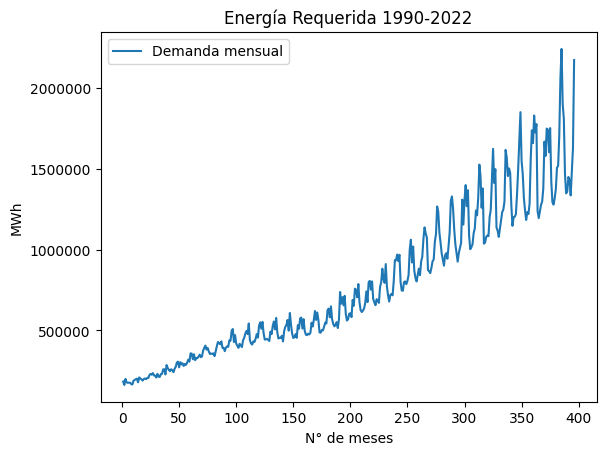

In [ ]:
# Figura de series temporal de Energía Requierida (MWh)#
ax = df.plot(legend=False)
ax.legend(['Demanda mensual'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía Requerida 1990-2022')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

***Parámetros estadisticos de la serie original***

In [ ]:
df.describe()

,Energía (MWh)
count,3.960000e+02
mean,7.691330e+05
std,4.487677e+05
min,1.628337e+05
25%,4.263037e+05
50%,6.352472e+05
75%,1.097606e+06
max,2.242835e+06


# ***2. Descomposición multiplicativa de la serie temporal original***

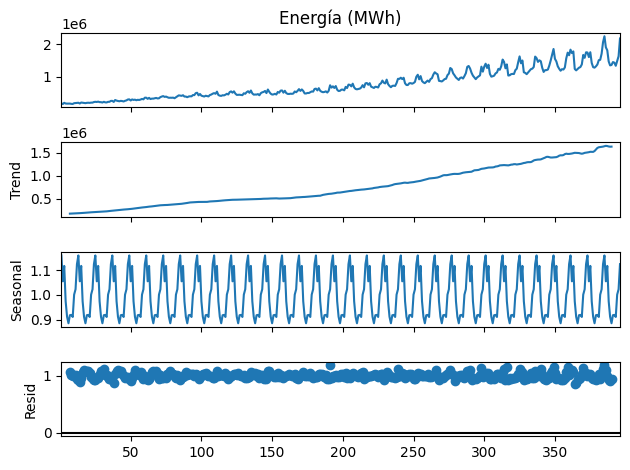

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dec_multiplicative = seasonal_decompose(df['Energía (MWh)'], model='multiplicative', period=12)
s_dec_multiplicative.plot()
plt.show()

Obs: Se puede observar que hay tendencia y es creciente la serie en el transcurso del tiempo. Seguido realizaremos la prueba de Dicky Fuller para comprobar si es estacionaria o no.

# ***3. Prueba de Dick-Fuller (Prueba si la serie es estacionaria o no)***
Es una prueba estadística utilizada en el análisis de series temporales para determinar si una serie temporal es estacionaria o no.

In [ ]:
#Nombramos a nuestro base de datos como data#
data = df['Energía (MWh)']

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: 3.504780
p-valor: 1.000000
Valores Críticos:
	1%: -3.447
	5%: -2.869
	10%: -2.571


***Interpretación:***

El estadístico ADF es mayor que los valores críticos absolutos, no se puede rechazar la hipótesis nula de raíz unitaria.
El p-valor es 1, mayor que los niveles de significancia de 5% (0,05).

No hay evidencia para rechazar la hipótesis nula.

La serie analizada tendría un comportamiento NO ESTACIONARIO, tal como se evidencia en la descomposición de la serie original.


# ***3.Pruebas de ACF y PACF (antes del ajuste)***

**Pruebas de ACF & PACF**

a. La ACF muestra la correlación de una serie temporal consigo misma en diferentes rezagos o retardos. Ayuda a identificar patrones y posible estacionalidad.

b. La PACF mide la correlación entre la serie y sus valores rezagados, eliminando la dependencia de los rezagos intermedios.

c. Se recomienda graficar la ACF y PACF de una serie antes de ajustar un modelo. Esto da una idea sobre el tipo de modelo que podría ser adecuado (AR, MA, ARMA, etc).

d. Si la ACF decae lentamente, indica un proceso MA. Si la PACF se corta después de unos pocos rezagos, indica un proceso AR.

Una vez ajustado un modelo, se puede verificar su diagnóstico con la ACF y PACF de los residuos, que deben parecer ruido blanco.



***Antes de ajustar el modelo:***

a. Para identificar el orden p y q tentativo de los parámetros AR y MA. La PACF y ACF dan indicios sobre cuántos rezagos de AR y MA pueden ser significativos.

b. Para verificar la posible presencia de estacionalidad. Los picos en la ACF pueden indicar estacionalidad.

c. Para tener una idea inicial si el proceso parece AR, MA, ARMA, etc. antes de seleccionar el modelo.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

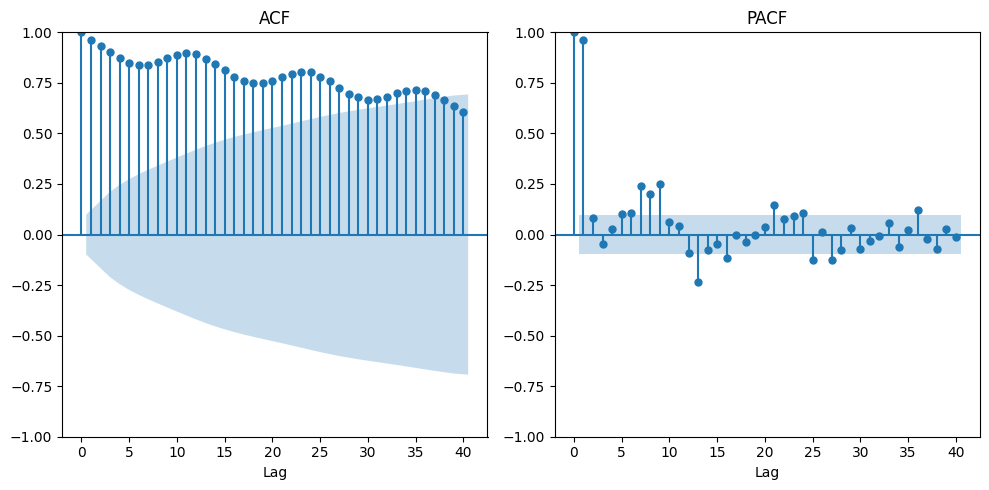

In [ ]:
# Graficar ACF y PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(data, lags=40, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(data, lags=40, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf
import numpy as np
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(data)
# Suma de coeficientes ACF significativos
acf_sum_1 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(data))])
# Número de coeficientes ACF significativos
num_signif_1 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(data))])
# Promedio ACF primeros 10 lags
acf_mean10_1 = np.mean(np.abs(acf_values[:40]))
print('Métricas ACF:')
print('Suma:', acf_sum_1)
print('Num Significativos:', num_signif_1)
print('Promedio 40:', acf_mean10_1)

Métricas ACF:
Suma: 21.888266162315677
Num Significativos: 26
Promedio 40: 0.8418563908582952


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(y_pred_13)
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_1 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(y_pred_13))])
# Número de coeficientes significativos
num_signif_1 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(y_pred_13))])
# Promedio PACF primeros 40 lags
pacf_mean10_1 = np.mean(np.abs(pacf_values[:40]))
print('Métricas PACF:')
print('Suma:', pacf_sum_1)
print('Número significativos:', num_signif_1)
print('Promedio 40 lags:', pacf_mean10_1)

Métricas PACF:
Suma: 2.372295127126463
Número significativos: 12
Promedio 40 lags: 0.17847848653084236


**ACF:**

 El eje x representa el rezago y el eje y representa el coeficiente de correlación. La línea azul representa los valores de ACF y el área sombreada en celeste representa el intervalo de confianza del 95%. Los valores de ACF comienzan en 1 en el rezago 0 y disminuyen o aunmentan un poco a medida que aumenta el rezago.
 Para un retraso cero, el ACF siempre es igual a uno, lo que tiene sentido porque indica que está perfectamente correlacionada consigo misma.

**PACF**:

La función de autocorrelación parcial captura una correlación "directa" entre una serie temporal y una versión rezagada de sí misma.


# ***4. Modelo AR (1)***

Para el ajuste del modelo se ha utilizado las herramienta de Solver del Excel.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_3 = pd.read_excel("/content/AR(1).xlsx", parse_dates=['Fechas'], index_col='Fechas')
df_3['AR1'] = df_3['AR1'].astype(float)

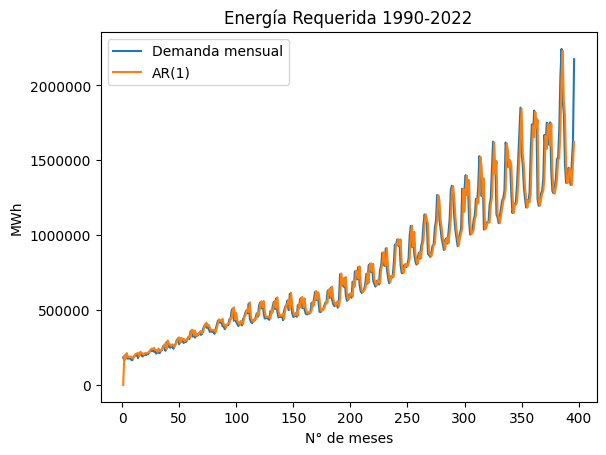

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_5 = pd.concat([df["Energía (MWh)"], df_3], axis=1)
#GRÁFICO
ax = concatenated_df_5.plot(legend=False)
ax.legend(['Demanda mensual', 'AR(1)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía Requerida 1990-2022')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

***4.1 Resumen estadistico del modelo AR (1)***

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
# Herramientas de análisis
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
model = AutoReg(df_3['AR1'], lags=1)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    AR1   No. Observations:                  396
Model:                     AutoReg(1)   Log Likelihood               -5067.433
Method:               Conditional MLE   S.D. of innovations          90219.934
Date:                Wed, 15 Nov 2023   AIC                          10140.866
Time:                        17:58:08   BIC                          10152.803
Sample:                             1   HQIC                         10145.595
                                  396                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.989e+04   9162.591      2.171      0.030    1932.882    3.78e+04
AR1.L1         0.9794      0.010     94.323      0.000       0.959       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0210           +0.0000j            1.0210            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
print('Coefficients:', model_fit.params)
print('P-values:', model_fit.pvalues)
print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)
print('Log Likelihood:', model_fit.llf)

Coefficients: const     19891.230806
AR1.L1        0.979407
dtype: float64
P-values: const     0.029937
AR1.L1    0.000000
dtype: float64
AIC: 10140.865923920153
BIC: 10152.802581214857
Log Likelihood: -5067.432961960077


***4.2 Métricas de errores AR (1)***

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cálculo de RMSE
rmse = np.sqrt(mean_squared_error(df['Energía (MWh)'] , df_3['AR1']))
# Cálculo de MAE
mae = mean_absolute_error(df['Energía (MWh)'] , df_3['AR1'])
test_array = df['Energía (MWh)'].to_numpy().flatten()
y_pred_3_array = df_3['AR1'].to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test_array - y_pred_3_array) / test_array)) * 100
# Cálculo del R^2
r2 = r2_score(df['Energía (MWh)'], df_3['AR1'])
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'R^2: {r2:.3f}')

RMSE: 95447.57
MAE: 60005.83
MAPE: 7.49%
R^2: 0.955


**4.3 Gráficos del ACF y PACF del modelo AR (1)**

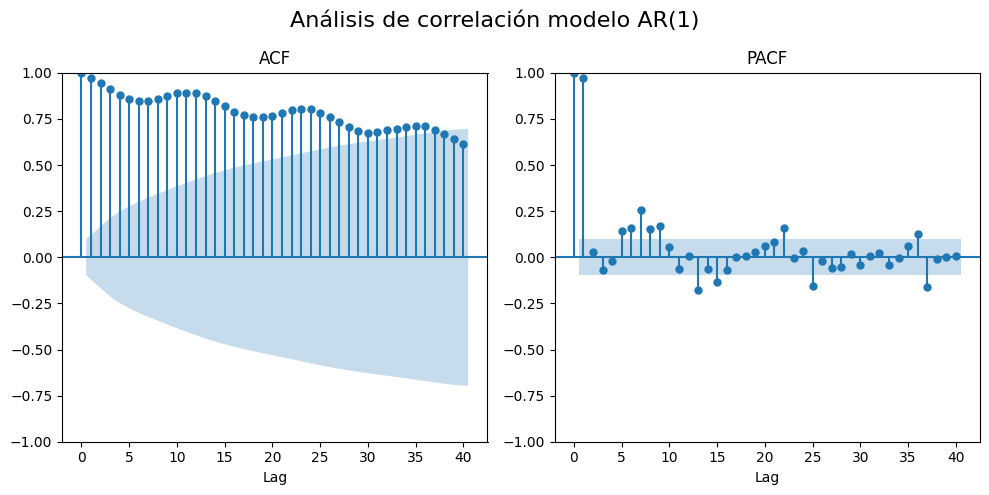

In [ ]:
# Graficar ACF y PACF modelo AR (1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(df_3['AR1'], lags=40, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(df_3['AR1'], lags=40, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo AR(1)', fontsize=16)
plt.tight_layout()
plt.show()

*Obs: Se realiza las pruebas del ACF y PACF, luego del ajuste por los siguiente:*

a. Para validar que los residuos del modelo ajustado se comportan como ruido blanco, sin autocorrelación.

b. Para verificar que se ha capturado toda la dependencia temporal en los parámetros.

c. Para detectar posible mal especificación del modelo. Si hay autocorrelación significativa en los residuos, el modelo puede requerir términos AR o MA adicionales.

Obs: Como el p-valor > 0,05 , esto sugiere que no podemos confiar en el modelo AR (1) para modelar y realizar nuestro pronósticos. Asimismo, nos da indicio que no funciona bien para series de tiempo **NO ESTACIONARIO**.

NO CUMPLE LA CONDICIÓN DE ESTACIONALIDAD.

In [ ]:
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(df_3['AR1'])
# Suma de coeficientes ACF significativos
acf_sum_4 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(df_3['AR1'] ))])
# Número de coeficientes ACF significativos
num_signif_4 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(df_3['AR1']))])
# Promedio ACF primeros 10 lags
acf_mean40_4 = np.mean(np.abs(acf_values[:40]))
print('Métricas ACF:')
print('Suma:', acf_sum_4)
print('Num Significativos:', num_signif_4)
print('Promedio 40:', acf_mean40_4)

Métricas ACF:
Suma: 22.028765662812752
Num Significativos: 26
Promedio 40: 0.8472602178004904


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(df_3['AR1'])
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_4 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(df_3['AR1']))])
# Número de coeficientes significativos
num_signif_4 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(df_3['AR1']))])
# Promedio PACF primeros 40 lags
pacf_mean40_4 = np.mean(np.abs(pacf_values[:40]))
print('Métricas PACF:')
print('Suma:', pacf_sum_4)
print('Número significativos:', num_signif_4)
print('Promedio 40 lags:', pacf_mean40_4)

Métricas PACF:
Suma: 2.6834927262603974
Número significativos: 11
Promedio 40 lags: 0.1712092781690656


**4.4 Análisis de residuos**

In [ ]:
residuo_1 = model_fit.resid

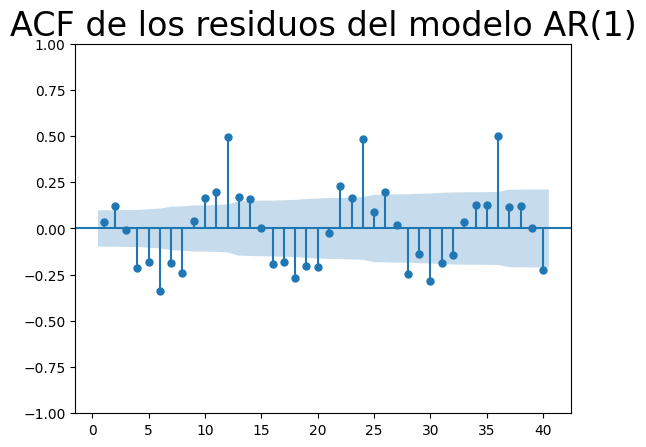

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(residuo_1, zero = False, lags = 40)
plt.title("ACF de los residuos del modelo AR(1)", size=24)
plt.show()

Obs: Para que los residuos de un modelo AR(1) sean válidos, se debe cumplir que no presenten autocorrelación. Aqui podemos observar hay varios valores significativos, por lo que si hay indicios de autocorrelación.

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_1)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: -1.430645
p-valor: 0.567500
Valores Críticos:
	1%: -3.448
	5%: -2.869
	10%: -2.571


Obs: Mediante el test de Dickey-Fuller se puede probar la estacionariedad de los residuos. Si el p-valor del test es mayor a 0.05, entonces no se puede rechazar la hipótesis nula (no estacionariedad). Es decir, como el p-valor es mayor a 0.05, se concluye que los residuos del modelo AR(1) no son estacionarios.

Seguido, se grafica el ruido del modelo del residuo y si el modelo es optimo debería parecer a un ruido blanco.

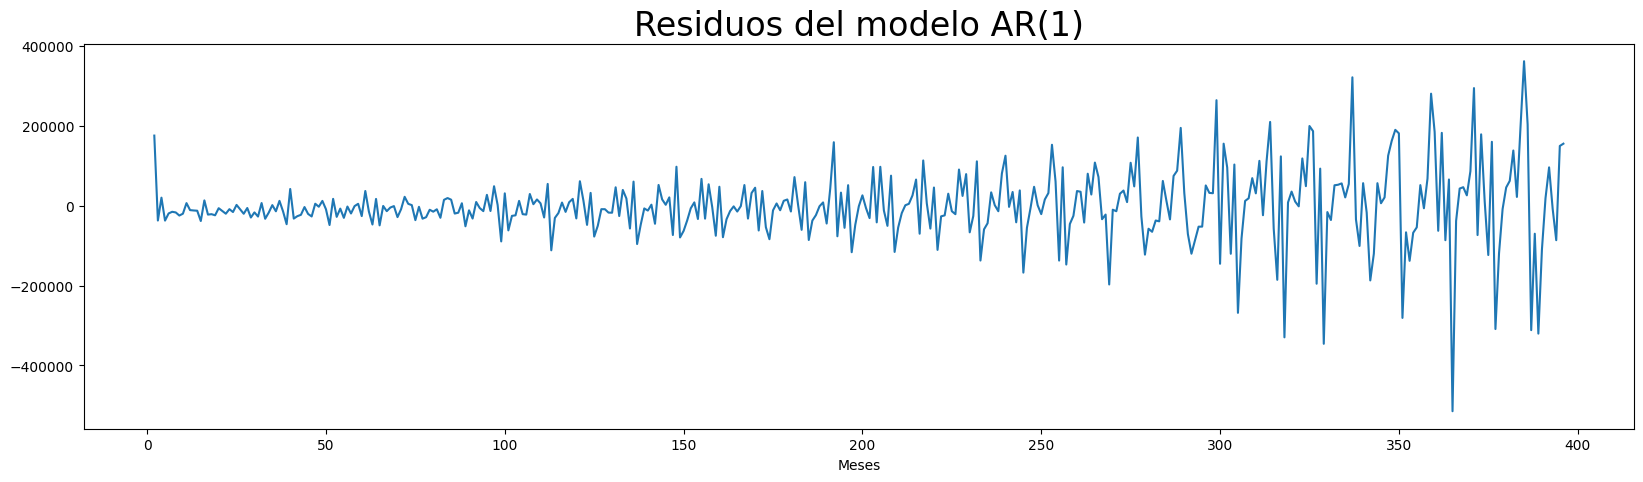

In [ ]:
residuo_1.plot(figsize=(20,5))
plt.title("Residuos del modelo AR(1)",size=24)
plt.xlabel("Meses")
plt.show()

***Conclusión:***

Como el residuo del modelo AR (1) no se asemeja a un ruido blanco, asi tambien por las pruebas de estacionariedaD, ACF, PACF, se puede afirmar que el modelo no es el más adecuado.

# ***5. Modelo AR (2)***

In [ ]:
df_5 = pd.read_excel("/content/AR(2).xlsx", parse_dates=['Meses'], index_col='Meses')
df_5['AR(2)'] = df_5['AR(2)'].astype(float)

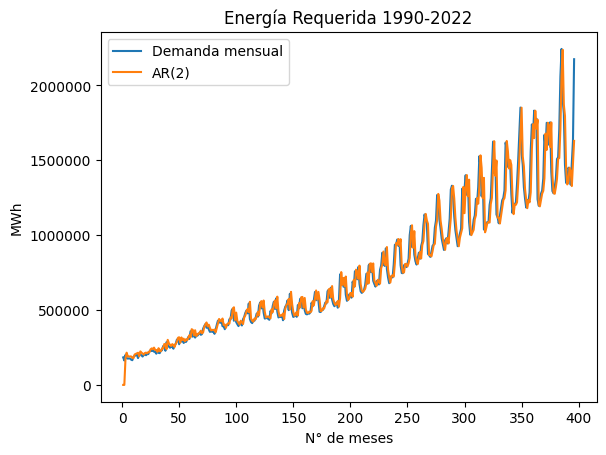

In [ ]:
concatenated_df_6 = pd.concat([df["Energía (MWh)"], df_5], axis=1)
#GRÁFICO
ax = concatenated_df_6.plot(legend=False)
ax.legend(['Demanda mensual', 'AR(2)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía Requerida 1990-2022')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

***5.1 Resumen estadistico del modelo AR (2)***

In [ ]:
model_ar2 = AutoReg(df_5['AR(2)'], lags=2)
model_fit_ar2 = model_ar2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_fit_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  AR(2)   No. Observations:                  396
Model:                     AutoReg(2)   Log Likelihood               -5075.310
Method:               Conditional MLE   S.D. of innovations          95087.998
Date:                Wed, 15 Nov 2023   AIC                          10158.619
Time:                        19:51:24   BIC                          10174.525
Sample:                             2   HQIC                         10164.922
                                  396                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.15e+04   9718.597      2.213      0.027    2456.128    4.06e+04
AR(2).L1       0.9554      0.051     18.904      0.000       0.856       1.055
AR(2).L2       0.0220      0.051      0.436      0.663      -0.077       0.121
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0225           +0.0000j            1.0225            0.0000
AR.2          -44.3581           +0.0000j           44.3581            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
print('Coefficients:', model_fit_ar2.params)
print('P-values:', model_fit_ar2.pvalues)
print('AIC:', model_fit_ar2.aic)
print('BIC:', model_fit_ar2.bic)
print('Log Likelihood:', model_fit_ar2.llf)

Coefficients: const       21504.227920
AR(2).L1        0.955444
AR(2).L2        0.022048
dtype: float64
P-values: const       2.691912e-02
AR(2).L1    1.058149e-79
AR(2).L2    6.625231e-01
dtype: float64
AIC: 10158.619293274303
BIC: 10174.524696911494
Log Likelihood: -5075.309646637152


***OBS: AHORA COMPARAMOS CON LOS RESULTADOS DEL MODELO AR (1)***

In [ ]:
print("AR(1):  \t LL = ", model_fit.llf, "\t AIC = ", model_fit.aic)
print("AR(2):  \t LL = ", model_fit_ar2.llf, "\t AIC = ", model_fit_ar2.aic)

AR(1):  	 LL =  -5067.432961960077 	 AIC =  10140.865923920153
AR(2):  	 LL =  -5075.309646637152 	 AIC =  10158.619293274303


Se espera mayor Log. verosimilitud y menor AIC.

LL:  AR (1) > AR (2)

AIC: AR (1) < AR (2)

Por este criterio se argumenta que el modelo AR (1) es mejor que el modelo AR (2) y nos presenta suficiente evidencia que NO es correcto seguir sobreajustando con un modelo AR (n).
De todas formas, seguimos realizando las demás pruebas establecidas.

***5.2 Métricas de errores AR (2)***

In [ ]:
# Cálculo del RMSE
rmse_2 = np.sqrt(mean_squared_error(df['Energía (MWh)'] , df_5['AR(2)']))
# Cálculo del MAE
mae_2 = mean_absolute_error(df['Energía (MWh)'] , df_5['AR(2)'])
test_array_2 = df['Energía (MWh)'].to_numpy().flatten()
y_pred_3_array_2 = df_5['AR(2)'].to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape_2 = np.mean(np.abs((test_array - y_pred_3_array) / test_array)) * 100
# Cálculo del R^2
r2_2 = r2_score(df['Energía (MWh)'], df_5['AR(2)'])
print(f'RMSE: {rmse_2:.2f}')
print(f'MAE: {mae_2:.2f}')
print(f'MAPE: {mape_2:.2f}%')
print(f'R^2: {r2_2:.3f}')

RMSE: 95647.72
MAE: 60187.22
MAPE: 7.73%
R^2: 0.954


***Comparamos las métricas de error del modelo AR(1) y el modelo AR(2):***

In [ ]:
print(f"AR(1): \t RMSE = {rmse:.2f}, \t MAE = {mae:.2f}, " f"\t MAPE = {mape:.2f}%, \t R^2 = {r2:.3f}")
print(f"AR(2): \t RMSE = {rmse_2:.2f}, \t MAE = {mae_2:.2f}, " f"\t MAPE = {mape_2:.2f}%, \t R^2 = {r2_2:.3f}")


AR(1): 	 RMSE = 95447.57, 	 MAE = 60005.83, 	 MAPE = 7.49%, 	 R^2 = 0.955
AR(2): 	 RMSE = 95647.72, 	 MAE = 60187.22, 	 MAPE = 7.73%, 	 R^2 = 0.954


***OBSERVACIÓN:*** A través de las métricas de error se puede observar que el modelo AR(2) presenta un error levemente mayor en comparación al modelo AR(1). Este resultado da indicios de que si se tuviera que elegir el modelo más adecuado bajo el criterio de error, sería el modelo AR(1). Es decir, el modelo AR(1) muestra un desempeño mejor que el modelo AR(2) según las métricas evaluadas.

**5.3 Gráficos del ACF y PACF del modelo AR (2)**

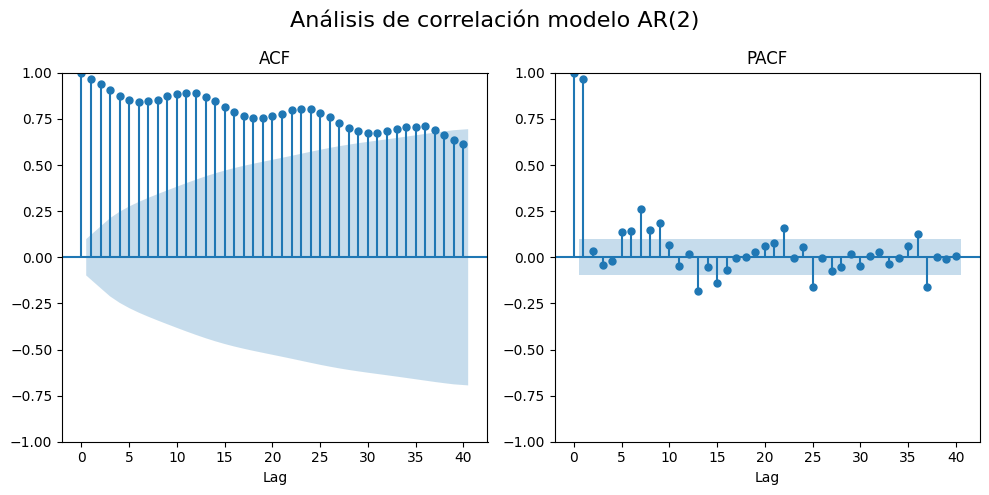

In [ ]:
# Graficar ACF y PACF modelo AR (2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(df_5['AR(2)'], lags=40, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(df_5['AR(2)'], lags=40, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo AR(2)', fontsize=16)
plt.tight_layout()
plt.show()

**OBSERVACIÓN:** Sin cambios significativos en comapración con el modelo AR (1).

**5.4 Análisis de residuos**

In [ ]:
residuo_2 = model_fit_ar2.resid

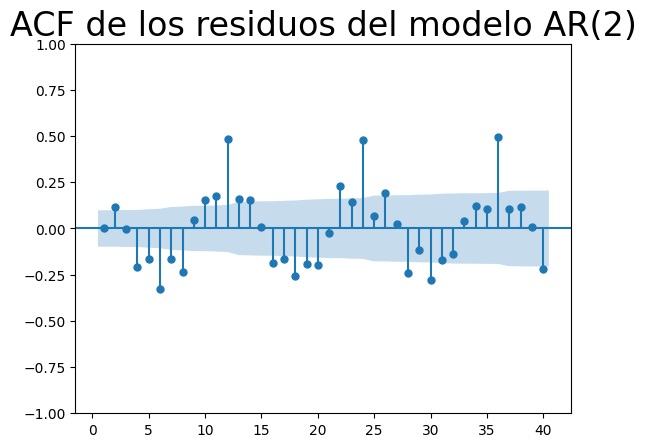

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(residuo_2, zero = False, lags = 40)
plt.title("ACF de los residuos del modelo AR(2)", size=24)
plt.show()

OBS: Sin cambios significativos en comparción con el modelo AR (1). Se observa autocorrelación en los residuos en el modelo AR (2).

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_2)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: -1.349832
p-valor: 0.606077
Valores Críticos:
	1%: -3.448
	5%: -2.869
	10%: -2.571


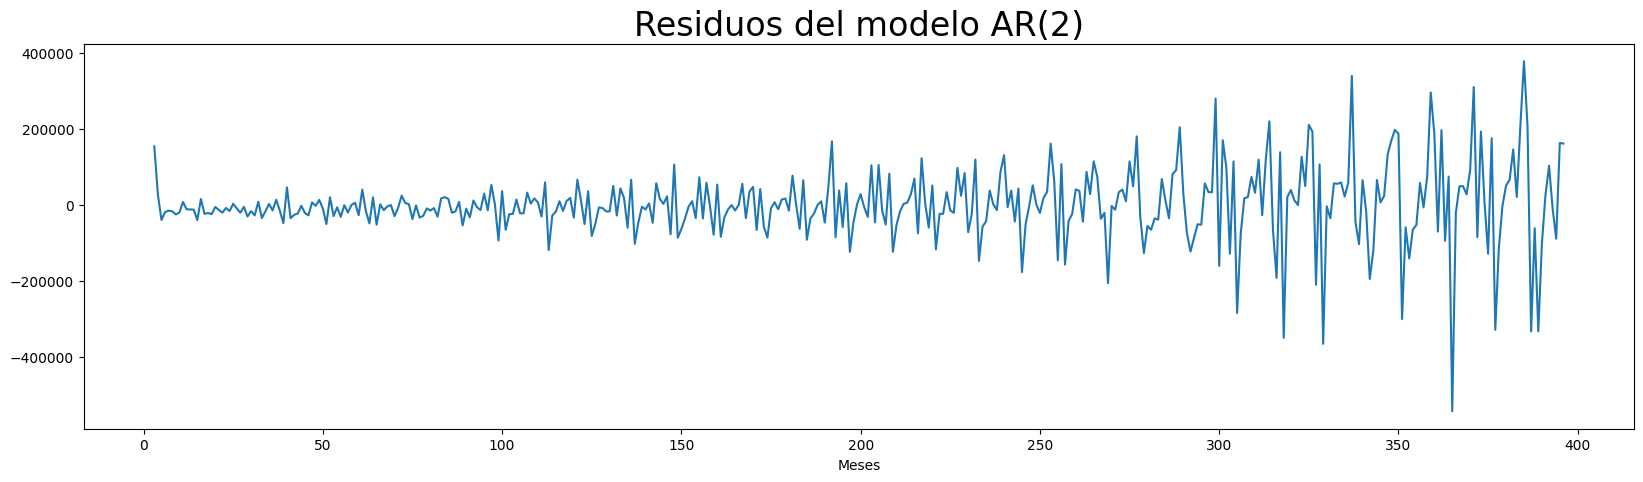

In [ ]:
residuo_2.plot(figsize=(20,5))
plt.title("Residuos del modelo AR(2)",size=24)
plt.xlabel("Meses")
plt.show()

OBS: Sin cambios significativos en comparción con el modelo AR (1).

***CONCLUSIÓN:***

"El correlograma de los residuos indica que éstos no siguen un proceso de ruido blanco."

"Se rechaza la hipótesis de que los residuos sigan un proceso de ruido blanco, dado que presentan autocorrelación significativa."

"Los residuos no cumplen con las propiedades de ruido blanco"



**APARTIR DE ESTE ANÁLISIS, SEGUIMOS ESTUDIANDO LA SERIE TEMPORAL MEDIANTE LOS MODELOS DE MEDIAS MÓVILES**

# ***6. Modelo MA (1)***

In [ ]:
df_6 = pd.read_excel("/content/MA(1).xlsx", parse_dates=['Meses'], index_col='Meses')
df_6['MA(1)'] = df_6['MA(1)'].astype(float)

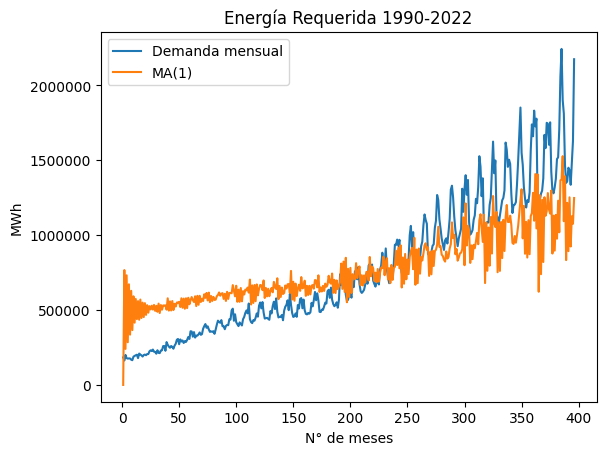

In [ ]:
concatenated_df_7 = pd.concat([df["Energía (MWh)"], df_6], axis=1)
#GRÁFICO
ax = concatenated_df_7.plot(legend=False)
ax.legend(['Demanda mensual', 'MA(1)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía Requerida 1990-2022')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

***6.1 Resumen estadistico del modelo MA (1)***

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
model_ma2 = ARIMA(df["Energía (MWh)"], order=(0,0,1))
model_fit_ma2 = model_ma2.fit()

In [ ]:
model_fit_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  MA(1)   No. Observations:                  396
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -5398.298
Date:                Thu, 16 Nov 2023   AIC                          10802.595
Time:                        02:12:48   BIC                          10814.539
Sample:                             0   HQIC                         10807.327
                                - 396                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.655e+05   1.62e+04     47.317      0.000    7.34e+05    7.97e+05
ma.L1          0.3239      0.051      6.398      0.000       0.225       0.423
sigma2      4.895e+10      0.029    1.7e+12      0.000     4.9e+10     4.9e+10
===================================================================================
Ljung-Box (L1) (Q):                  27.31   Jarque-Bera (JB):                51.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.31e+33. Standard errors may be unstable.
"""

In [ ]:
print('Coefficients:', model_fit_ma1.params)
print('P-values:', model_fit_ma1.pvalues)
print('AIC:', model_fit_ma1.aic)
print('BIC:', model_fit_ma1.bic)
print('Log Likelihood:', model_fit_ma1.llf)

Coefficients: const     7.654530e+05
ma.L1     3.239167e-01
sigma2    4.895197e+10
dtype: float64
P-values: const     0.000000e+00
ma.L1     1.570785e-10
sigma2    0.000000e+00
dtype: float64
AIC: 10802.595105302958
BIC: 10814.539347936721
Log Likelihood: -5398.297552651479


***6.2 Métricas de errores MA(1)***

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cálculo del RMSE
rmse = np.sqrt(mean_squared_error(df['Energía (MWh)'] , df_6['MA(1)']))
# Cálculo del MAE
mae = mean_absolute_error(df['Energía (MWh)'] , df_6['MA(1)'])
test_array = df['Energía (MWh)'].to_numpy().flatten()
y_pred_3_array = df_6['MA(1)'].to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test_array - y_pred_3_array) / test_array)) * 100
# Cálculo del R2
r2 = r2_score(df['Energía (MWh)'], df_6['MA(1)'])
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'R^2: {r2:.3f}')

RMSE: 259061.32
MAE: 210183.38
MAPE: 40.64%
R^2: 0.666


***6.3 Gráficos del ACF y PACF del modelo MA (1)***

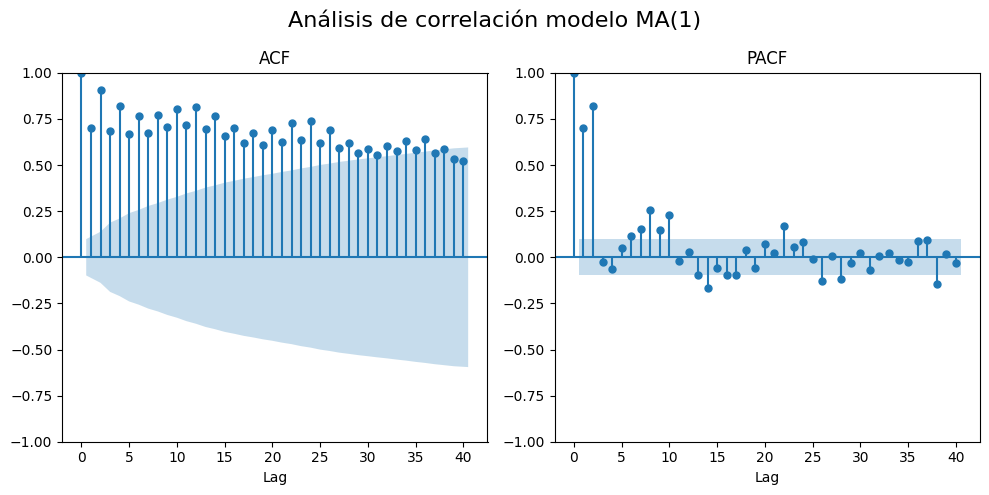

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Graficar ACF y PACF modelo MA (1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(df_6['MA(1)'], lags=40, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(df_6['MA(1)'], lags=40, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo MA(1)', fontsize=16)
plt.tight_layout()
plt.show()

***6.4 Análisis de residuos***

In [ ]:
residuo_3 = model_fit_ma1.resid

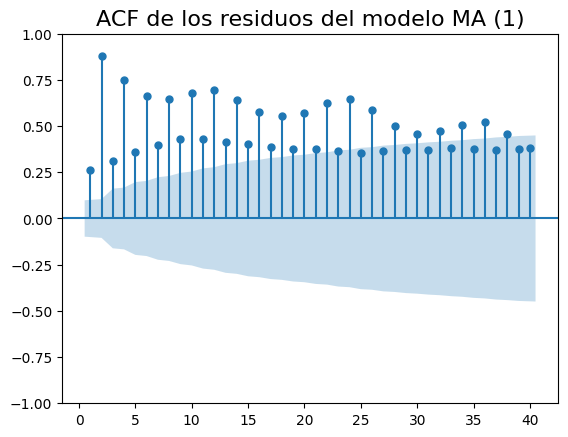

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(residuo_3, zero = False, lags = 40)
plt.title("ACF de los residuos del modelo MA (1)", size=16)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_3)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: 3.456314
p-valor: 1.000000
Valores Críticos:
	1%: -3.448
	5%: -2.869
	10%: -2.571


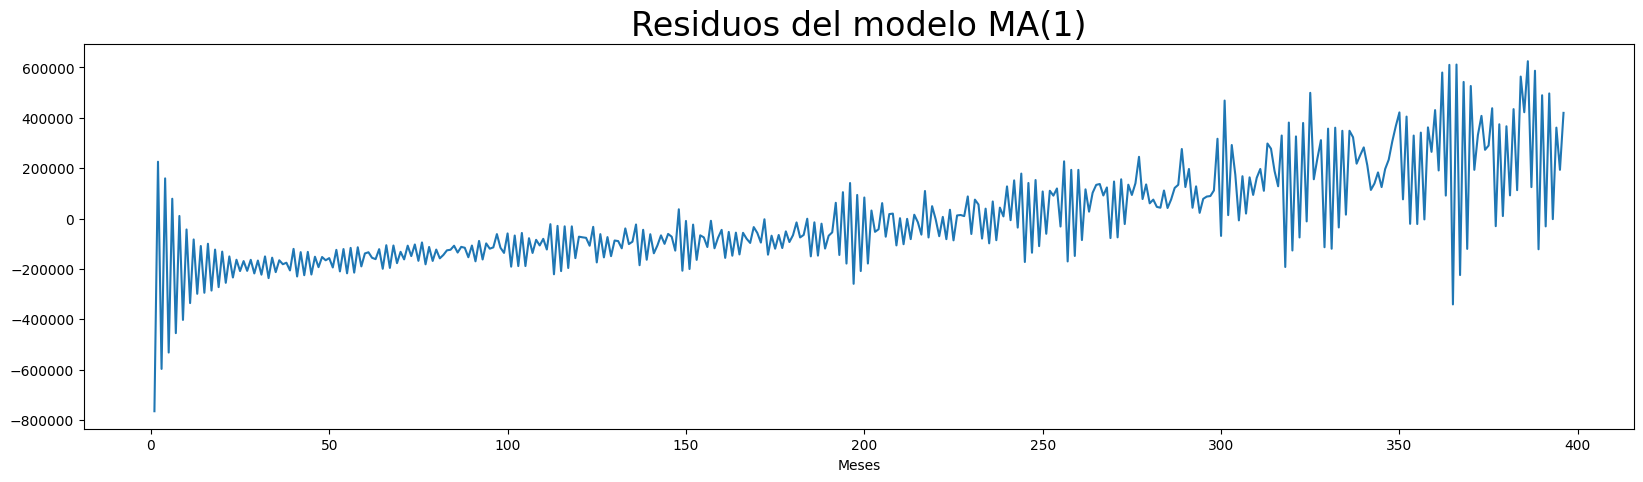

In [ ]:
residuo_3.plot(figsize=(20,5))
plt.title("Residuos del modelo MA(1)",size=24)
plt.xlabel("Meses")
plt.show()

OBS: El residuo del modelo MA (1) no se asemeja a las caracteristicas de ruido blanco.

El correlograma indica que la serie presenta autocorrelación.
Dado estas caracteriticas se decide verificar los resultados con el modelo MA (2).

# **7. Modelo MA (2)**

In [ ]:
df_7 = pd.read_excel("/content/MA(2).xlsx", parse_dates=['Meses'], index_col='Meses')
df_7['MA(2)'] = df_7['MA(2)'].astype(float)

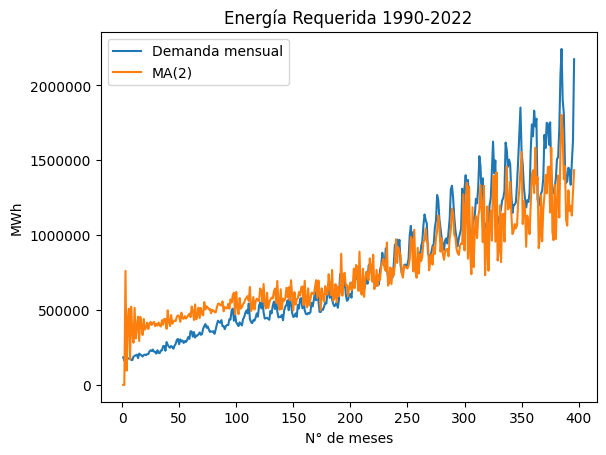

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_8 = pd.concat([df["Energía (MWh)"], df_7], axis=1)
#GRÁFICO
ax = concatenated_df_8.plot(legend=False)
ax.legend(['Demanda mensual', 'MA(2)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía Requerida 1990-2022')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

***7.1 Resumen estadistico del modelo MA (2)***

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
model_ma2 = ARIMA(df["Energía (MWh)"], order=(0,0,2))
model_fit_ma2 = model_ma2.fit()

In [ ]:
model_fit_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Energía (MWh)   No. Observations:                  396
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -5536.350
Date:                Tue, 28 Nov 2023   AIC                          11080.700
Time:                        14:02:34   BIC                          11096.626
Sample:                             0   HQIC                         11087.010
                                - 396                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.691e+05   1.45e+05      5.291      0.000    4.84e+05    1.05e+06
ma.L1          1.1914      0.135      8.805      0.000       0.926       1.457
ma.L2          0.7500      0.131      5.713      0.000       0.493       1.007
sigma2      1.828e+11      0.222   8.24e+11      0.000    1.83e+11    1.83e+11
===================================================================================
Ljung-Box (L1) (Q):                  93.32   Jarque-Bera (JB):                83.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.02e+27. Standard errors may be unstable.
"""

In [ ]:
print('Coefficients:\n', model_fit_ma2.params)
print('P-values:', model_fit_ma2.pvalues)
print('AIC:', model_fit_ma2.aic)
print('BIC:', model_fit_ma2.bic)
print('Log Likelihood:', model_fit_ma2.llf)

Coefficients:
 const     7.691330e+05
ma.L1     1.191405e+00
ma.L2     7.499657e-01
sigma2    1.827899e+11
dtype: float64
P-values: const     1.215825e-07
ma.L1     1.312247e-18
ma.L2     1.112109e-08
sigma2    0.000000e+00
dtype: float64
AIC: 11080.70027492928
BIC: 11096.625931774299
Log Likelihood: -5536.35013746464


In [ ]:
print("MA(1):  \t LL = ", model_fit_ma1.llf, "\t AIC = ", model_fit_ma1.aic)
print("MA(2):  \t LL = ", model_fit_ma2.llf, "\t AIC = ", model_fit_ma2.aic)

MA(1):  	 LL =  -5398.297552651479 	 AIC =  10802.595105302958
MA(2):  	 LL =  -5536.35013746464 	 AIC =  11080.70027492928


LL: MA (1) > MA (2)

AIC: MA (1) < MA (2)

Si decidimos por el criterio del LL y AIC, entonces, el modelo MA (1) es mejor.

***7.2 Métricas de errores MA(2)***

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cálculo del RMSE
rmse = np.sqrt(mean_squared_error(df['Energía (MWh)'] , df_7['MA(2)']))
# Cálculo del MAE
mae = mean_absolute_error(df['Energía (MWh)'] , df_7['MA(2)'])
test_array = df['Energía (MWh)'].to_numpy().flatten()
y_pred_3_array = df_7['MA(2)'].to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test_array - y_pred_3_array) / test_array)) * 100
# Cálculo del R^2
r2 = r2_score(df['Energía (MWh)'], df_7['MA(2)'])
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'R^2: {r2:.3f}')

RMSE: 186846.74
MAE: 147738.34
MAPE: 27.42%
R^2: 0.826


COMPARAMOS LAS MÉTRICAS DE ERRORES DE AMBOS MODELOS DE MEDIA MÓVILES:


MA (1): MAPE: 40.64%

        R^2: 0.666                                             
        
 MA (2) MAPE: 27.42%

        R^2: 0.82

OBS: Si decidieramos por las métricas de errores, el mejor modelo es el MA (2)

***7.3 Gráficos del ACF y PACF del modelo MA (2)***

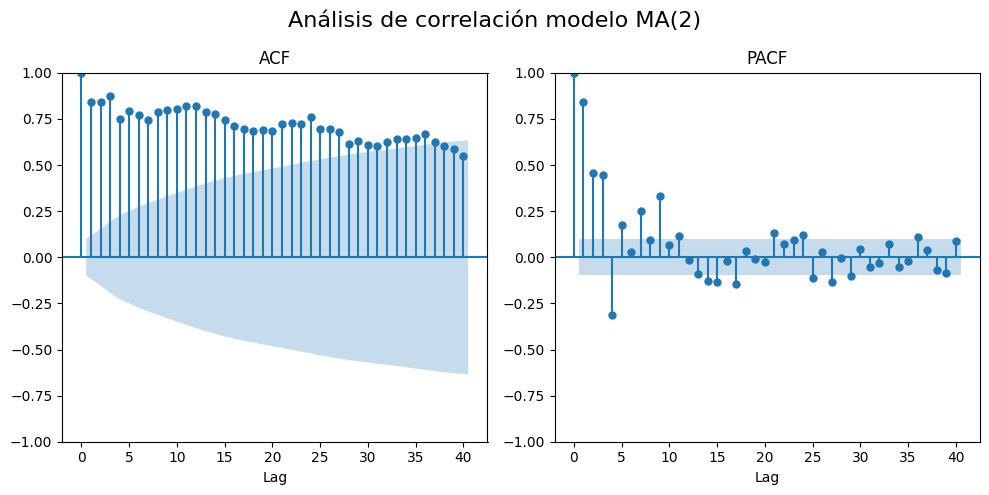

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Graficar ACF y PACF modelo MA (1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(df_7['MA(2)'], lags=40, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(df_7['MA(2)'], lags=40, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo MA(2)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(df_7['MA(2)'] )
# Suma de coeficientes ACF significativos
acf_sum_2 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(df_7['MA(2)'] ))])
# Número de coeficientes ACF significativos
num_signif_2 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(df_7['MA(2)'] ))])
# Promedio ACF primeros 10 lags
acf_mean40_2 = np.mean(np.abs(acf_values[:40]))
print('Métricas ACF:')
print('Suma:', acf_sum_2)
print('Num Significativos:', num_signif_2)
print('Promedio 40:', acf_mean40_2)

Métricas ACF:
Suma: 20.044143184264744
Num Significativos: 26
Promedio 40: 0.7709285840101825


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(df_7['MA(2)'] )
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_2 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(df_7['MA(2)'] ))])
# Número de coeficientes significativos
num_signif_2 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(df_7['MA(2)'] ))])
# Promedio PACF primeros 40 lags
pacf_mean40_2 = np.mean(np.abs(pacf_values[:40]))
print('Métricas PACF:')
print('Suma:', pacf_sum_2)
print('Número significativos:', num_signif_2)
print('Promedio 40 lags:', pacf_mean40_2)

Métricas PACF:
Suma: 3.516319927615385
Número significativos: 16
Promedio 40 lags: 0.21429501517468924


***7.4 Análisis de residuos del modelo MA (2)***

In [ ]:
residuo_4 = model_fit_ma2.resid

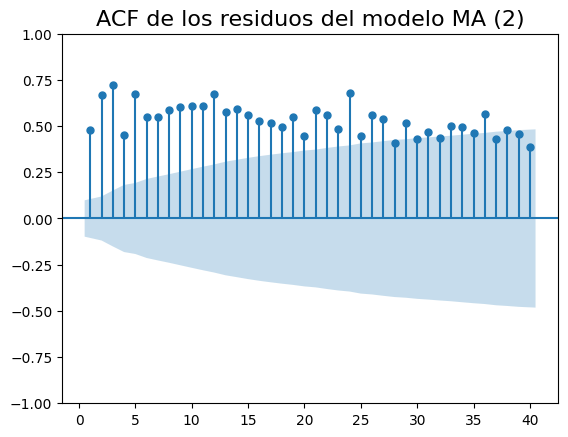

In [ ]:
sgt.plot_acf(residuo_4, zero = False, lags = 40)
plt.title("ACF de los residuos del modelo MA (2)", size=16)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_4)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: 2.931397
p-valor: 1.000000
Valores Críticos:
	1%: -3.448
	5%: -2.869
	10%: -2.571


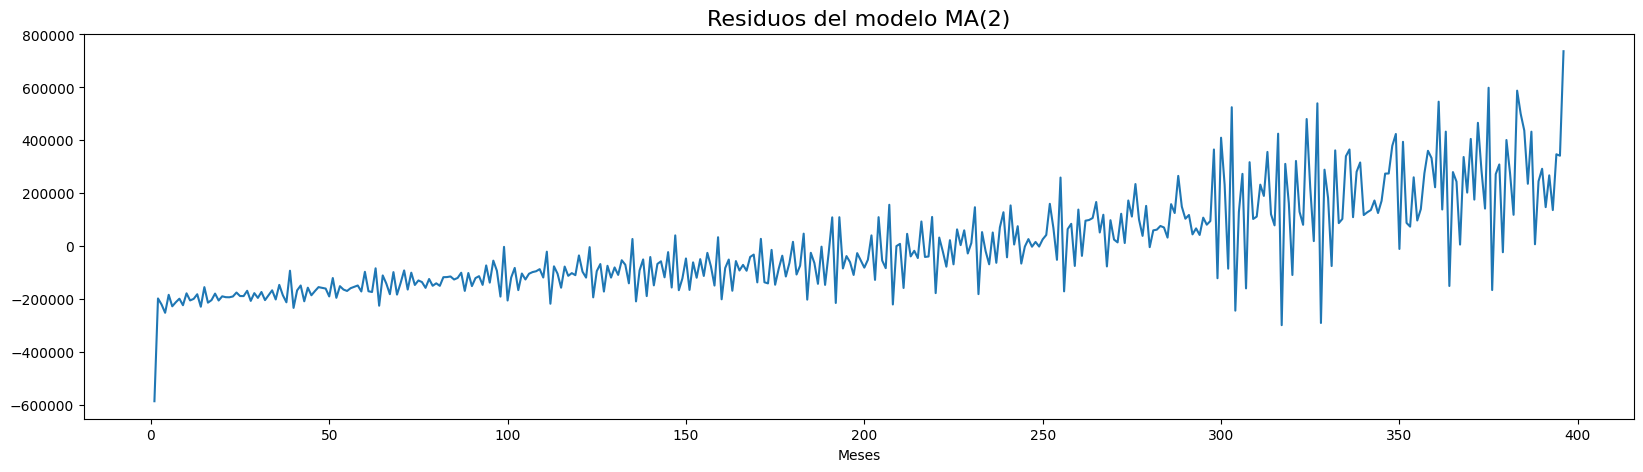

In [ ]:
residuo_4.plot(figsize=(20,5))
plt.title("Residuos del modelo MA(2)",size=16)
plt.xlabel("Meses")
plt.show()

# ***8. Modelo ARMA (1,1)***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_8 = pd.read_excel("/content/ARMA.xlsx", parse_dates=['Meses'], index_col='Meses')
df_8['ARMA'] = df_8['ARMA'].astype(float)

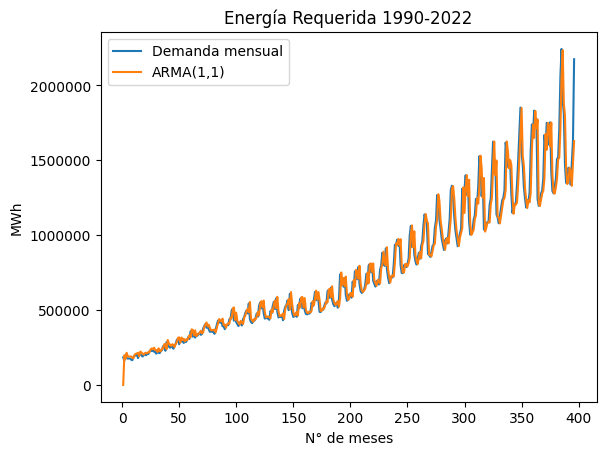

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_9 = pd.concat([df["Energía (MWh)"], df_8], axis=1)
#GRÁFICO
ax = concatenated_df_9.plot(legend=False)
ax.legend(['Demanda mensual', 'ARMA(1,1)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía Requerida 1990-2022')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

**8.1 Resumen estadistico del modelo ARMA (1,1)**

In [ ]:
model_arma11 = ARIMA(df["Energía (MWh)"], order=(1,0,1))
model_fit_arma11 = model_arma11.fit()

In [ ]:
model_fit_arma11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Energía (MWh)   No. Observations:                  396
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5103.101
Date:                Tue, 28 Nov 2023   AIC                          10214.201
Time:                        14:33:38   BIC                          10230.127
Sample:                             0   HQIC                         10220.511
                                - 396                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.691e+05   1.12e-10   6.88e+15      0.000    7.69e+05    7.69e+05
ar.L1          0.9856      0.009    110.158      0.000       0.968       1.003
ma.L1          0.0453      0.051      0.893      0.372      -0.054       0.145
sigma2      9.115e+09   1.25e-12   7.27e+21      0.000    9.11e+09    9.11e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               854.36
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              27.99   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.86e+37. Standard errors may be unstable.
"""

In [ ]:
print('Coefficients:\n', model_fit_arma11.params)
print('P-values:', model_fit_arma11.pvalues)
print('AIC:', model_fit_arma11.aic)
print('BIC:', model_fit_arma11.bic)
print('Log Likelihood:', model_fit_arma11.llf)

Coefficients:
 const     7.691330e+05
ar.L1     9.856237e-01
ma.L1     4.533244e-02
sigma2    9.114763e+09
dtype: float64
P-values: const     0.000000
ar.L1     0.000000
ma.L1     0.371598
sigma2    0.000000
dtype: float64
AIC: 10214.201313668918
BIC: 10230.126970513937
Log Likelihood: -5103.100656834459


***8.2 Métricas de errores ARMA(1,1)***

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cálculo del RMSE
rmse_3 = np.sqrt(mean_squared_error(df['Energía (MWh)'] , df_8['ARMA']))
# Cálculo del MAE
mae_3 = mean_absolute_error(df['Energía (MWh)'] , df_8['ARMA'])
test_array = df['Energía (MWh)'].to_numpy().flatten()
y_pred_3_array = df_8['ARMA'].to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape_3 = np.mean(np.abs((test_array - y_pred_3_array) / test_array)) * 100
# Cálculo del R^2
r2_3 = r2_score(df['Energía (MWh)'], df_8['ARMA'])
print(f'RMSE: {rmse_3:.2f}')
print(f'MAE: {mae_3:.2f}')
print(f'MAPE: {mape_3:.2f}%')
print(f'R^2: {r2_3:.3f}')

RMSE: 95343.83
MAE: 59863.72
MAPE: 7.51%
R^2: 0.955


***8.3 Gráficos del ACF y PACF del modelo ARMA (1,1)***

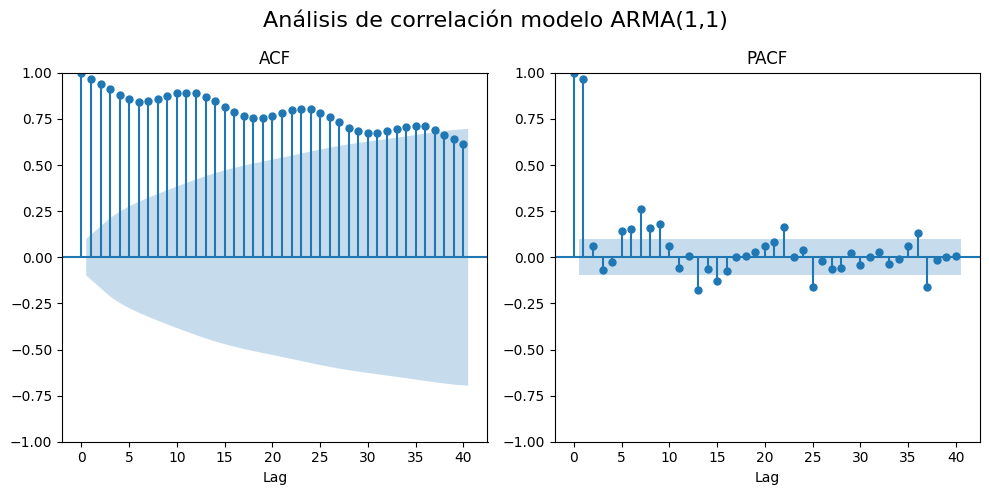

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Graficar ACF y PACF modelo MA (1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(df_8['ARMA'], lags=40, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(df_8['ARMA'], lags=40, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo ARMA(1,1)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(df_8['ARMA'])
# Suma de coeficientes ACF significativos
acf_sum_3 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(df_8['ARMA'] ))])
# Número de coeficientes ACF significativos
num_signif_3 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(df_8['ARMA']))])
# Promedio ACF primeros 10 lags
acf_mean40_3 = np.mean(np.abs(acf_values[:40]))
print('Métricas ACF:')
print('Suma:', acf_sum_3)
print('Num Significativos:', num_signif_3)
print('Promedio 40:', acf_mean40_3)

Métricas ACF:
Suma: 21.990188217039343
Num Significativos: 26
Promedio 40: 0.8457764698861285


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(df_8['ARMA'])
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_3 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(df_8['ARMA']))])
# Número de coeficientes significativos
num_signif_3 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(df_8['ARMA']))])
# Promedio PACF primeros 40 lags
pacf_mean40_3 = np.mean(np.abs(pacf_values[:40]))
print('Métricas PACF:')
print('Suma:', pacf_sum_3)
print('Número significativos:', num_signif_3)
print('Promedio 40 lags:', pacf_mean40_3)

Métricas PACF:
Suma: 2.5833770074505056
Número significativos: 12
Promedio 40 lags: 0.1737144799776245


***8.4 Análisis de residuos del modelo ARMA (1,1)***

In [ ]:
residuo_5 = model_fit_arma11.resid

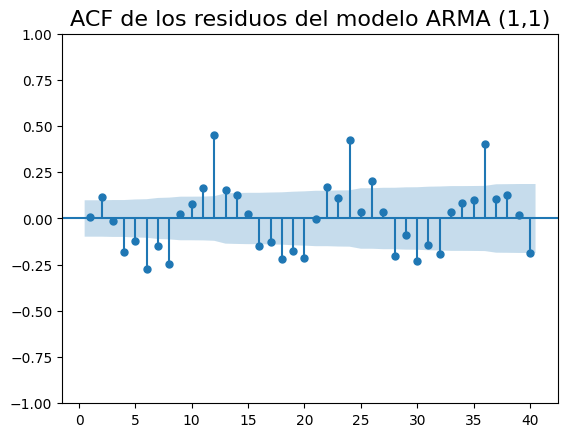

In [ ]:
sgt.plot_acf(residuo_5, zero = False, lags = 40)
plt.title("ACF de los residuos del modelo ARMA (1,1)", size=16)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_5)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: -2.081593
p-valor: 0.251980
Valores Críticos:
	1%: -3.448
	5%: -2.869
	10%: -2.571


OBS: A partir de aqui el p -valor ha mejorado. "SE CONCLUYE QUE DEBE APLICAR EL MÉTODO DE DIFERENCIACIÓN PARA QUE LA SERIE SEA ESTACIONARIA"

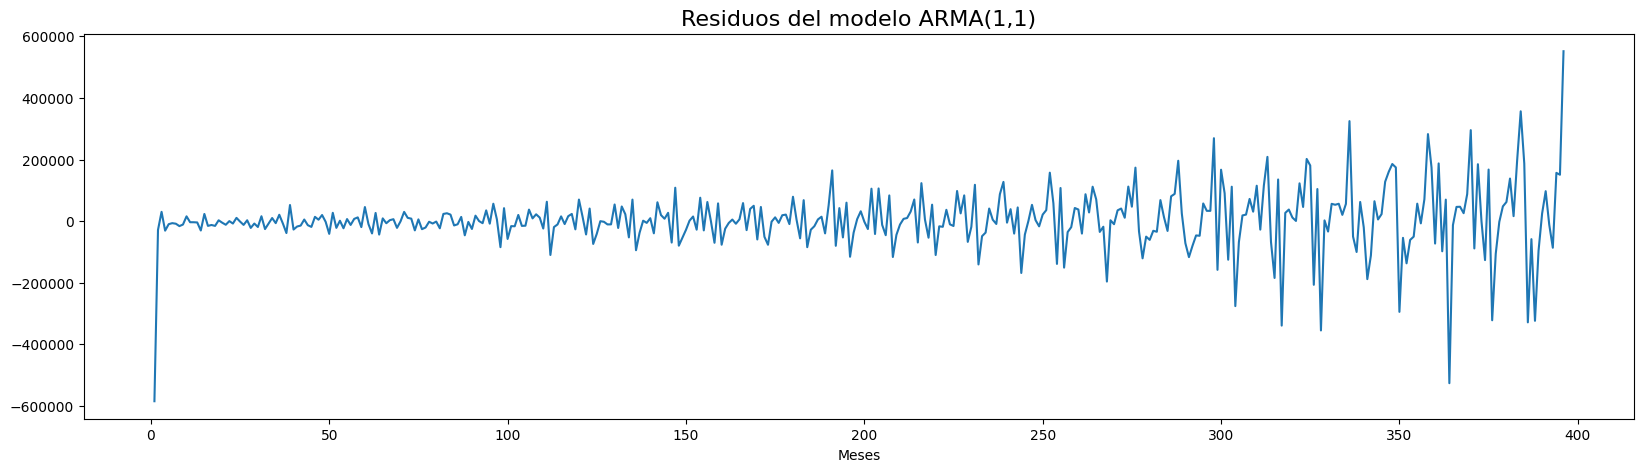

In [ ]:
residuo_5.plot(figsize=(20,5))
plt.title("Residuos del modelo ARMA(1,1)",size=16)
plt.xlabel("Meses")
plt.show()

OBS: No se asemeja a un ruido blanco, entonces, se puede concluir no es el modelo más adecuado.

# **9. Modelo ARIMA (3,1,5)**

In [ ]:
df_9 = pd.read_excel("/content/ARIMA315.xlsx", parse_dates=['Meses'], index_col='Meses')

In [ ]:
df_9['Energía [MWh]'] = df_9['Energía [MWh]'].astype(float)

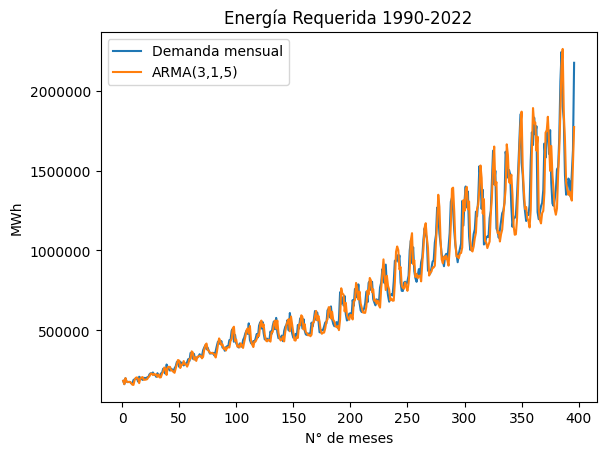

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_10 = pd.concat([df["Energía (MWh)"], df_9['Energía [MWh]']], axis=1)
#GRÁFICO
ax = concatenated_df_10.plot(legend=False)
ax.legend(['Demanda mensual', 'ARMA(3,1,5)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía Requerida 1990-2022')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

***9.1 Resumen estadistico del modelo ARIMA (3,1,5)***

In [ ]:
model_arima315 = ARIMA(df["Energía (MWh)"], order=(3,1,5))
model_fit_arima315 = model_arima315.fit()

In [ ]:
model_fit_arima315.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Energía (MWh)   No. Observations:                  396
Model:                 ARIMA(3, 1, 5)   Log Likelihood               -4958.701
Date:                Thu, 16 Nov 2023   AIC                           9935.402
Time:                        03:35:00   BIC                           9971.212
Sample:                             0   HQIC                          9949.590
                                - 396                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7930      0.159      4.983      0.000       0.481       1.105
ar.L2          0.6290      0.276      2.279      0.023       0.088       1.170
ar.L3         -0.9326      0.158     -5.891      0.000      -1.243      -0.622
ma.L1         -1.3769      0.166     -8.312      0.000      -1.702      -1.052
ma.L2         -0.3294      0.357     -0.922      0.356      -1.029       0.371
ma.L3          1.3391      0.247      5.412      0.000       0.854       1.824
ma.L4         -0.4740      0.064     -7.451      0.000      -0.599      -0.349
ma.L5         -0.0353      0.047     -0.749      0.454      -0.128       0.057
sigma2      4.754e+09   1.61e-10   2.96e+19      0.000    4.75e+09    4.75e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):               432.58
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):              17.49   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+35. Standard errors may be unstable.
"""

In [ ]:
print('Coefficients:\n', model_fit_arima315.params)
print('P-values:', model_fit_arima315.pvalues)
print('AIC:', model_fit_arima315.aic)
print('BIC:', model_fit_arima315.bic)
print('Log Likelihood:', model_fit_arima315.llf)

Coefficients:
 ar.L1     7.929679e-01
ar.L2     6.290377e-01
ar.L3    -9.326335e-01
ma.L1    -1.376861e+00
ma.L2    -3.293980e-01
ma.L3     1.339084e+00
ma.L4    -4.740344e-01
ma.L5    -3.531443e-02
sigma2    4.753527e+09
dtype: float64
P-values: ar.L1     6.266680e-07
ar.L2     2.266030e-02
ar.L3     3.844343e-09
ma.L1     9.405170e-17
ma.L2     3.563236e-01
ma.L3     6.229039e-08
ma.L4     9.233676e-14
ma.L5     4.540149e-01
sigma2    0.000000e+00
dtype: float64
AIC: 9935.401839363696
BIC: 9971.211811247806
Log Likelihood: -4958.700919681848


***8.2 Métricas de errores ARIMA(3,1,5)***

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cálculo del RMSE
rmse_4 = np.sqrt(mean_squared_error(df['Energía (MWh)'] , df_9['Energía [MWh]']))
# Cálculo del MAE
mae_4 = mean_absolute_error(df['Energía (MWh)'] ,df_9['Energía [MWh]'])
test_array = df['Energía (MWh)'].to_numpy().flatten()
y_pred_4_array = df_9['Energía [MWh]'].to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape_4 = np.mean(np.abs((test_array - y_pred_4_array) / test_array)) * 100
# Cálculo del R^2
r2_4 = r2_score(df['Energía (MWh)'], df_9['Energía [MWh]'])
print(f'RMSE: {rmse_4:.2f}')
print(f'MAE: {mae_4:.2f}')
print(f'MAPE: {mape_4:.2f}%')
print(f'R^2: {r2_4:.3f}')

RMSE: 87915.06
MAE: 57099.01
MAPE: 6.77%
R^2: 0.962


***9.3 Gráficos del ACF y PACF del modelo ARIMA (3,1,5)***

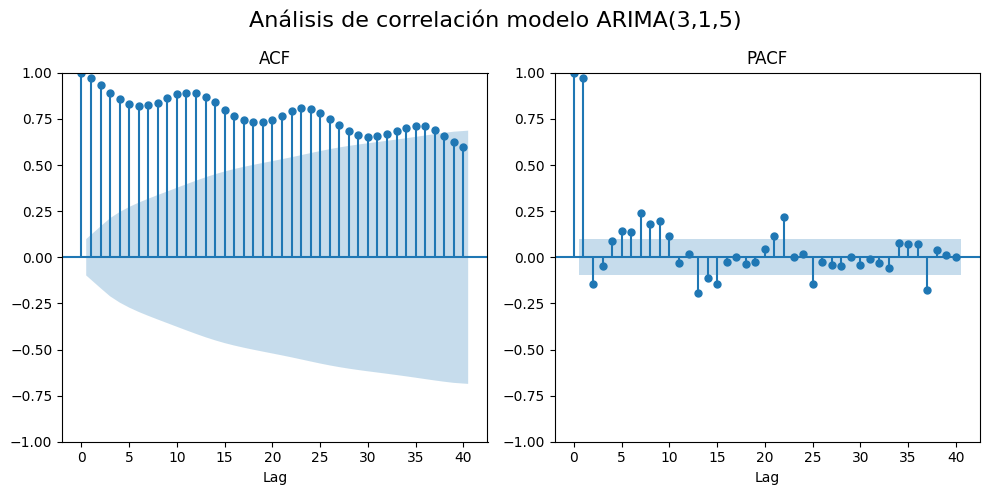

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Graficar ACF y PACF modelo MA (1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(df_9['Energía [MWh]'], lags=40, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(df_9['Energía [MWh]'], lags=40, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo ARIMA(3,1,5)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(df_9['Energía [MWh]'])
# Suma de coeficientes ACF significativos
acf_sum_6 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(df_9['Energía [MWh]']))])
# Número de coeficientes ACF significativos
num_signif_6 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(df_9['Energía [MWh]']))])
# Promedio ACF primeros 10 lags
acf_mean40_6 = np.mean(np.abs(acf_values[:40]))
print('Métricas ACF:')
print('Suma:', acf_sum_6)
print('Num Significativos:', num_signif_6)
print('Promedio 40:', acf_mean40_6)

Métricas ACF:
Suma: 21.6880077701969
Num Significativos: 26
Promedio 40: 0.8341541450075731


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(df_9['Energía [MWh]'])
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_6 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(df_9['Energía [MWh]']))])
# Número de coeficientes significativos
num_signif_6 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(df_9['Energía [MWh]']))])
# Promedio PACF primeros 40 lags
pacf_mean40_6= np.mean(np.abs(pacf_values[:40]))
print('Métricas PACF:')
print('Suma:', pacf_sum_6)
print('Número significativos:', num_signif_6)
print('Promedio 40 lags:', pacf_mean40_6)

Métricas PACF:
Suma: 2.8316543228437694
Número significativos: 16
Promedio 40 lags: 0.18712134417371218


***9.4 Análisis de residuos del modelo ARIMA (3,1,5)***

In [ ]:
residuo_6 = model_fit_arima315.resid

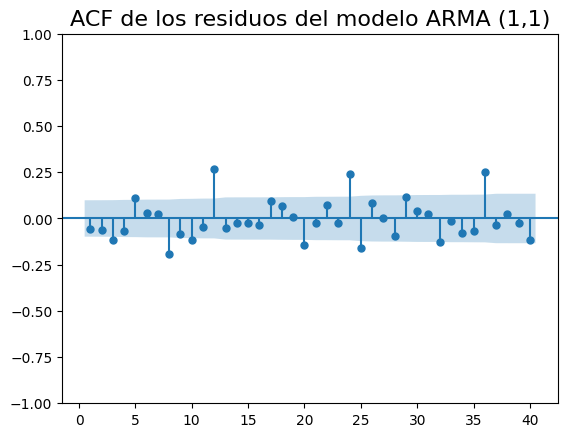

In [ ]:
sgt.plot_acf(residuo_6, zero = False, lags = 40)
plt.title("ACF de los residuos del modelo ARIMA (3,1,5)", size=16)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_6)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: -7.123712
p-valor: 0.000000
Valores Críticos:
	1%: -3.447
	5%: -2.869
	10%: -2.571


OBS: AHORA SE ACEPTA, la serie es estacionaria y el p-valor < 0,05.

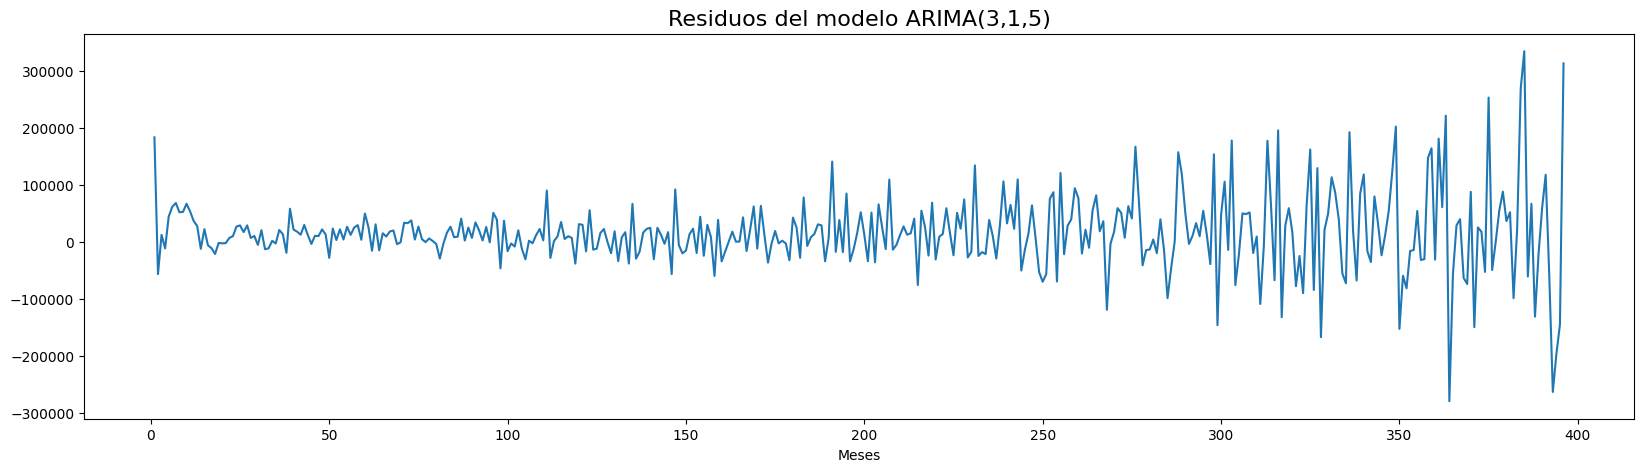

In [ ]:
residuo_6.plot(figsize=(20,5))
plt.title("Residuos del modelo ARIMA(3,1,5)",size=16)
plt.xlabel("Meses")
plt.show()

OBS: El modelo ARIMA (3,1,5) ha mejorado y los residuos un poco a un ruido blanco.

**Sin embargo, a partir de los análisis de los modelos anteriores, utilizaremos la función auto.arima, para determinar el modelo sugerido para la serie temporal utilizado.**

# ***10. SARIMA (3,1,5)(2,0,0,12)***

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.0 MB/s eta 0:00:00


In [ ]:
#Importamos está librería para no imprimr mensajes#
import warnings
warnings.filterwarnings("ignore")

***AUTOARIMA: Utilizamos esta librería par determinar de forma automatica el modelo más adecuado. siguiendo el criterio de AIC***

In [ ]:
# Auto ARIMA
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
auto_arima_model = auto_arima(data, trace=True, suppress_warnings=True, m=12)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=9994.547, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10181.997, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=10049.901, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=10110.776, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10181.101, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=10107.544, Time=0.95 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=10010.198, Time=1.10 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=9989.762, Time=4.89 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=9987.926, Time=2.58 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=9995.410, Time=2.46 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=10003.430, Time=2.01 sec
 ARIMA(3,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=5.02 sec
 ARIMA(2,1,3)(2,0,0)[12] intercept   : AIC=inf, Time=6.77 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=10012.477, Time=0.97 sec
 ARIMA(1,1,3)(2,0,0)[

In [ ]:
# Predicciones
predictions = auto_arima_model.predict(n_periods=14)
print(predictions)

396    2.117473e+06
397    1.875928e+06
398    1.861956e+06
399    1.561682e+06
400    1.416609e+06
401    1.386001e+06
402    1.420685e+06
403    1.449396e+06
404    1.490652e+06
405    1.597429e+06
406    1.767647e+06
407    2.150975e+06
408    2.210234e+06
409    1.977635e+06
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p, d, q = 3, 1, 5  # Órdenes no estacionales (igual que en ARIMA)
P, D, Q, s = 2, 0, 0, 12  # Órdenes estacionales
# Ajusta el modelo SARIMA
sarima_model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit()
# Realiza predicciones en el conjunto de prueba
y_pred_3= sarima_fit.predict(start=0, end=len(data)-1, dynamic=False)

In [ ]:
print(y_pred_3)

Fechas
1      0.000000e+00
2      1.875782e+05
3      1.581483e+05
4      2.113991e+05
5      1.398749e+05
           ...     
392    1.465261e+06
393    1.536041e+06
394    1.641932e+06
395    1.691127e+06
396    1.949034e+06
Name: predicted_mean, Length: 396, dtype: float64


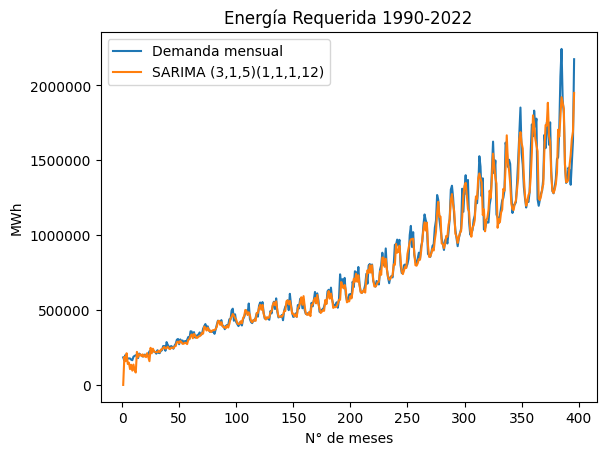

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_1 = pd.concat([data, y_pred_3], axis=1)
#GRÁFICO
ax = concatenated_df_1.plot(legend=False)
ax.legend(['Demanda mensual', 'SARIMA (3,1,5)(1,1,1,12)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía Requerida 1990-2022')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

***10.1 Resumen estadistico del modelo SARIMA (3,1,5)(2,O,0,12)***

In [ ]:
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       Energía (MWh)   No. Observations:                  396
Model:             SARIMAX(3, 1, 5)x(2, 0, [], 12)   Log Likelihood               -4916.892
Date:                             Tue, 28 Nov 2023   AIC                           9855.783
Time:                                     15:25:43   BIC                           9899.551
Sample:                                          0   HQIC                          9873.124
                                             - 396                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7673      0.054     14.255      0.000       0.662       0.873
ar.L2          0.6691      0.091      7.329      0.000       0.490       0.848
ar.L3         -0.9534      0.056    -17.111      0.000      -1.063      -0.844
ma.L1         -1.3912      0.070    -19.777      0.000      -1.529      -1.253
ma.L2         -0.4532      0.139     -3.264      0.001      -0.725      -0.181
ma.L3          1.5799      0.080     19.852      0.000       1.424       1.736
ma.L4         -0.4866      0.085     -5.713      0.000      -0.654      -0.320
ma.L5         -0.1955      0.058     -3.388      0.001      -0.309      -0.082
ar.S.L12       0.3899      0.048      8.129      0.000       0.296       0.484
ar.S.L24       0.3837      0.055      6.952      0.000       0.276       0.492
sigma2      4.754e+09   7.65e-12   6.21e+20      0.000    4.75e+09    4.75e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               991.37
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):              20.71   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.87e+37. Standard errors may be unstable.
"""

In [ ]:
print('Coefficients:\n', sarima_fit.params)
print('P-values:', sarima_fit.pvalues)
print('AIC:', sarima_fit.aic)
print('BIC:', sarima_fit.bic)
print('Log Likelihood:', sarima_fit.llf)

Coefficients:
 ar.L1       7.673477e-01
ar.L2       6.691493e-01
ar.L3      -9.533704e-01
ma.L1      -1.391211e+00
ma.L2      -4.531988e-01
ma.L3       1.579915e+00
ma.L4      -4.866409e-01
ma.L5      -1.955341e-01
ar.S.L12    3.898794e-01
ar.S.L24    3.837154e-01
sigma2      4.753527e+09
dtype: float64
P-values: ar.L1       4.182929e-46
ar.L2       2.318766e-13
ar.L3       1.222818e-65
ma.L1       4.715139e-87
ma.L2       1.097086e-03
ma.L3       1.067402e-87
ma.L4       1.110259e-08
ma.L5       7.037176e-04
ar.S.L12    4.320898e-16
ar.S.L24    3.608993e-12
sigma2      0.000000e+00
dtype: float64
AIC: 9855.783024505741
BIC: 9899.550767919654
Log Likelihood: -4916.891512252871


***10.2 Métricas de errores SARIMA(3,1,5)(2,0,0,12)***

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cálculo del RMSE
rmse_4 = np.sqrt(mean_squared_error(df['Energía (MWh)'] , y_pred_3))
# Cálculo del MAE
mae_4 = mean_absolute_error(df['Energía (MWh)'] , y_pred_3)
test_array = df['Energía (MWh)'].to_numpy().flatten()
y_pred_4_array = y_pred_3.to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape_4 = np.mean(np.abs((test_array - y_pred_4_array) / test_array)) * 100
# Cálculo del R^2
r2_4 = r2_score(df['Energía (MWh)'], y_pred_3)
print(f'RMSE: {rmse_4:.2f}')
print(f'MAE: {mae_4:.2f}')
print(f'MAPE: {mape_4:.2f}%')
print(f'R^2: {r2_4:.3f}')

RMSE: 60434.81
MAE: 36086.30
MAPE: 5.03%
R^2: 0.982


***10.3 Gráficos del ACF y PACF del modelo SARIMA (3,1,5)(2,0,0,12)***

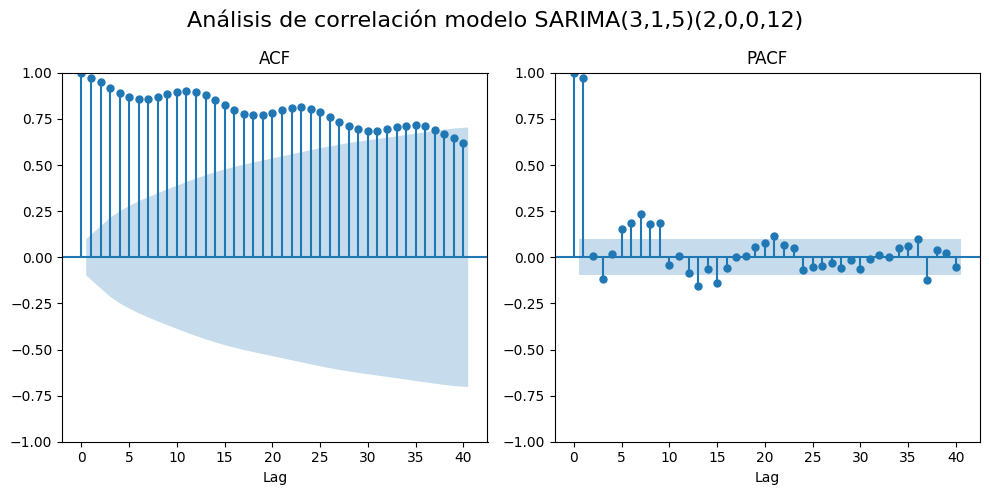

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Graficar ACF y PACF modelo MA (1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(y_pred_3, lags=40, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(y_pred_3, lags=40, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo SARIMA(3,1,5)(2,0,0,12)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(y_pred_3)
# Suma de coeficientes ACF significativos
acf_sum_7 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(y_pred_3))])
# Número de coeficientes ACF significativos
num_signif_7 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(y_pred_3))])
# Promedio ACF primeros 10 lags
acf_mean40_7 = np.mean(np.abs(acf_values[:40]))
print('Métricas ACF:')
print('Suma:', acf_sum_7)
print('Num Significativos:', num_signif_7)
print('Promedio 40:', acf_mean40_7)

Métricas ACF:
Suma: 22.242401592950383
Num Significativos: 26
Promedio 40: 0.8554769843442455


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(y_pred_3)
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_7 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(y_pred_3))])
# Número de coeficientes significativos
num_signif_7 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(y_pred_3))])
# Promedio PACF primeros 40 lags
pacf_mean40_7 = np.mean(np.abs(pacf_values[:40]))
print('Métricas PACF:')
print('Suma:', pacf_sum_7)
print('Número significativos:', num_signif_7)
print('Promedio 40 lags:', pacf_mean40_7)

Métricas PACF:
Suma: 2.845439937875518
Número significativos: 12
Promedio 40 lags: 0.17159596133800445


***10.4 Análisis de residuos del modelo SARIMA (3,1,5)(2,0,0,12)***

In [ ]:
residuo_7 = sarima_fit.resid

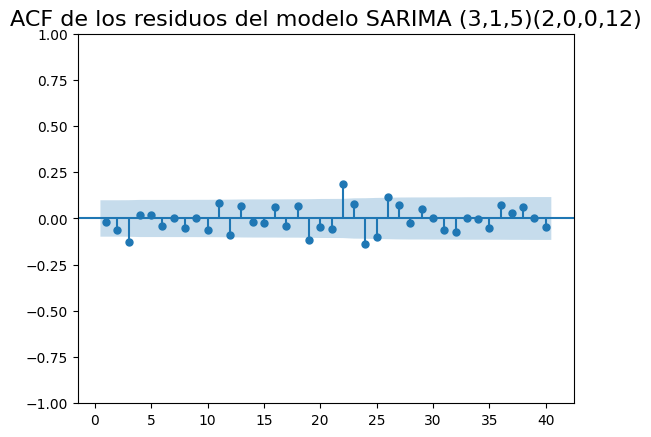

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(residuo_7, zero = False, lags = 40)
plt.title("ACF de los residuos del modelo SARIMA (3,1,5)(2,0,0,12)", size=16)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_7)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: -13.679717
p-valor: 0.000000
Valores Críticos:
	1%: -3.447
	5%: -2.869
	10%: -2.571


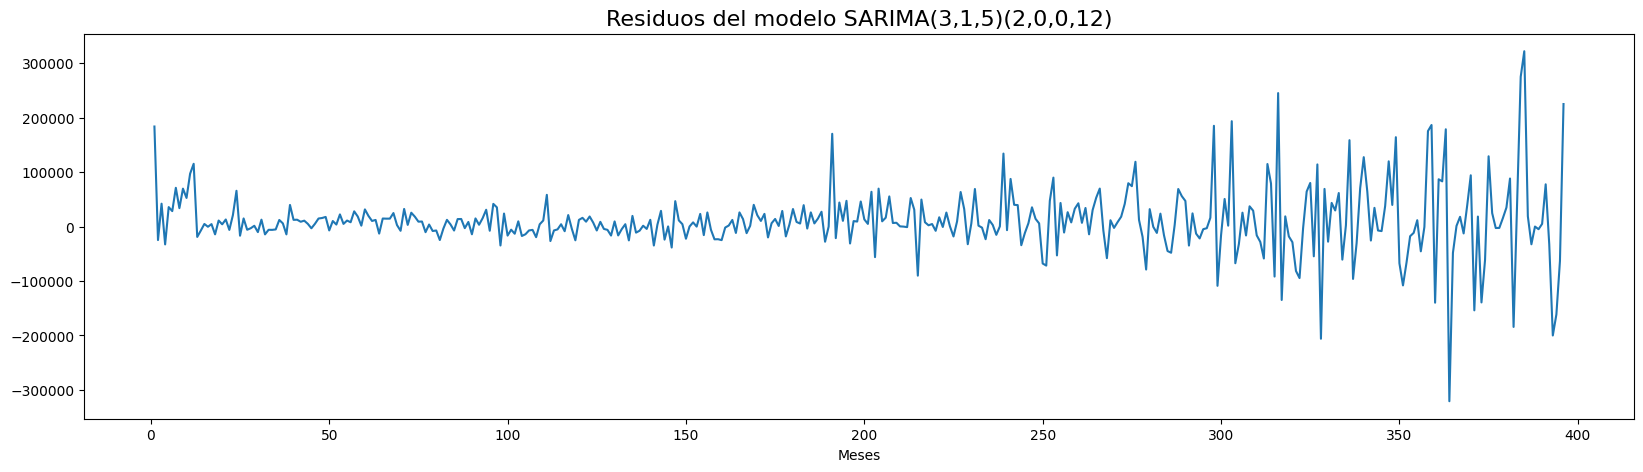

In [ ]:
residuo_7.plot(figsize=(20,5))
plt.title("Residuos del modelo SARIMA(3,1,5)(2,0,0,12)",size=16)
plt.xlabel("Meses")
plt.show()

# ***11. ARIMAX (3,1,5)***

Ahora incorporamos variables exógenas en los modelos, para evaluar si las mismas permiten mejorar las previsiones.

In [ ]:
df_02 = pd.read_excel("/content/Temperatura media mensual.xlsx", parse_dates=['Temperatura'], index_col='Meses')

In [ ]:
df_02['Temperatura'] = df_02['Temperatura'].astype(float)

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_2 = SARIMAX(data, exog=df_02['Temperatura'], order=(3, 1, 5))

In [ ]:
model_2_fit = model_2.fit()

In [ ]:
arimax_tot = model_2_fit.predict()

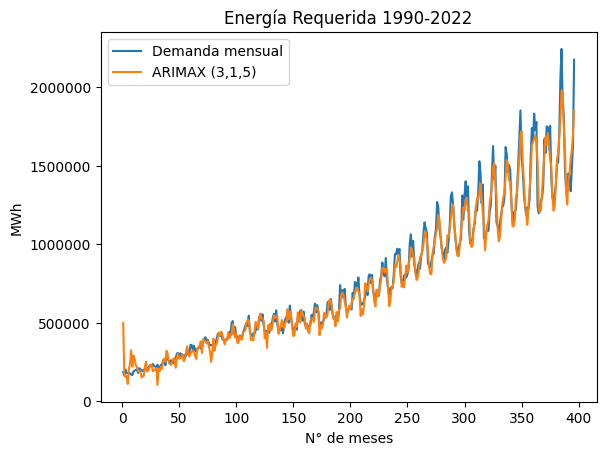

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_11 = pd.concat([data, arimax_tot], axis=1)
#GRÁFICO
ax = concatenated_df_11.plot(legend=False)
ax.legend(['Demanda mensual', 'ARIMAX (3,1,5)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía Requerida 1990-2022')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

 ***11.1 Resumen estadistico del modelo ARIMAX (3,1,5)***

In [ ]:
model_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Energía (MWh)   No. Observations:                  396
Model:               SARIMAX(3, 1, 5)   Log Likelihood               -4938.753
Date:                Tue, 28 Nov 2023   AIC                           9897.507
Time:                        14:57:38   BIC                           9937.296
Sample:                             0   HQIC                          9913.272
                                - 396                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperatura  1.675e+04   1274.777     13.141      0.000    1.43e+04    1.93e+04
ar.L1           0.7355      0.026     28.236      0.000       0.684       0.787
ar.L2           0.7250      0.042     17.186      0.000       0.642       0.808
ar.L3          -0.9826      0.025    -39.044      0.000      -1.032      -0.933
ma.L1          -1.2620      0.050    -25.158      0.000      -1.360      -1.164
ma.L2          -0.5136      0.091     -5.617      0.000      -0.693      -0.334
ma.L3           1.3894      0.070     19.931      0.000       1.253       1.526
ma.L4          -0.3874      0.062     -6.211      0.000      -0.510      -0.265
ma.L5          -0.0984      0.044     -2.254      0.024      -0.184      -0.013
sigma2       3.614e+09      0.001   2.54e+12      0.000    3.61e+09    3.61e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):               268.80
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               7.00   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.72e+27. Standard errors may be unstable.
"""

In [ ]:
print('Coefficients:\n', model_2_fit.params)
print('P-values:', model_2_fit.pvalues)
print('AIC:', model_2_fit.aic)
print('BIC:', model_2_fit.bic)
print('Log Likelihood:', model_2_fit.llf)

Coefficients:
 Temperatura    1.675234e+04
ar.L1          7.355065e-01
ar.L2          7.249936e-01
ar.L3         -9.825644e-01
ma.L1         -1.261979e+00
ma.L2         -5.136344e-01
ma.L3          1.389432e+00
ma.L4         -3.873574e-01
ma.L5         -9.842625e-02
sigma2         3.613793e+09
dtype: float64
P-values: Temperatura     1.906979e-39
ar.L1          2.112608e-175
ar.L2           3.357618e-66
ar.L3           0.000000e+00
ma.L1          1.169001e-139
ma.L2           1.939847e-08
ma.L3           2.183759e-88
ma.L4           5.262774e-10
ma.L5           2.421840e-02
sigma2          0.000000e+00
dtype: float64
AIC: 9897.506817558902
BIC: 9937.295675207914
Log Likelihood: -4938.753408779451


***11.2 Métricas de errores ARIMAX (3,1,5)***



In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cálculo del RMSE
rmse_11 = np.sqrt(mean_squared_error(df['Energía (MWh)'] , arimax_tot))
# Cálculo del MAE
mae_11 = mean_absolute_error(df['Energía (MWh)'] ,arimax_tot)
test_array = df['Energía (MWh)'].to_numpy().flatten()
y_pred_11_array = arimax_tot.to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape_11 = np.mean(np.abs((test_array - y_pred_11_array) / test_array)) * 100
# Cálculo del R^2
r2_11 = r2_score(df['Energía (MWh)'], arimax_tot)
print(f'RMSE: {rmse_11:.2f}')
print(f'MAE: {mae_11:.2f}')
print(f'MAPE: {mape_11:.2f}%')
print(f'R^2: {r2_11:.3f}')

RMSE: 66499.31
MAE: 45867.82
MAPE: 7.17%
R^2: 0.978


***11.3 Gráficos del ACF y PACF del modelo ARIMAX (3,1,5)***

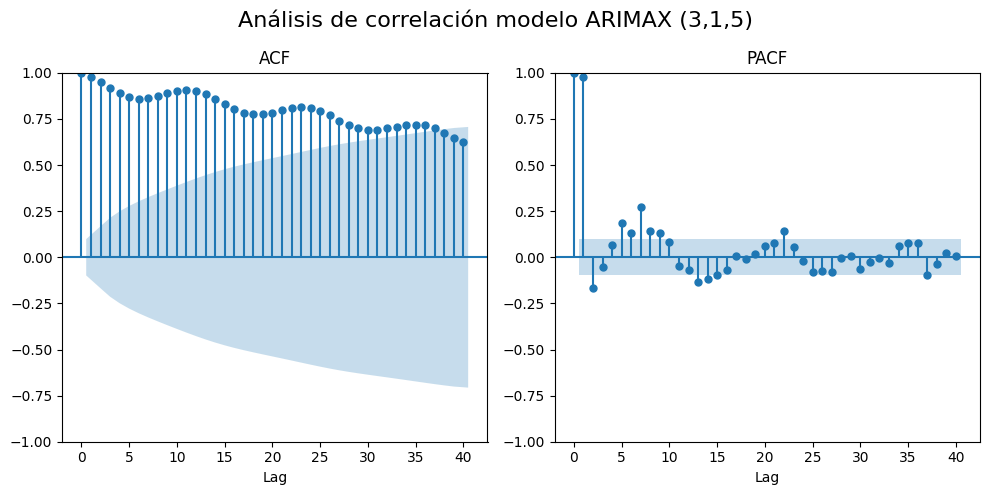

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Graficar ACF y PACF modelo MA (1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(arimax_tot, lags=40, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(arimax_tot, lags=40, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo ARIMAX (3,1,5)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(arimax_tot)
# Suma de coeficientes ACF significativos
acf_sum_4 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(arimax_tot))])
# Número de coeficientes ACF significativos
num_signif_4 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(arimax_tot))])
# Promedio ACF primeros 10 lags
acf_mean40_4 = np.mean(np.abs(acf_values[:40]))
print('Métricas ACF:')
print('Suma:', acf_sum_4)
print('Num Significativos:', num_signif_4)
print('Promedio 40:', acf_mean40_4)

Métricas ACF:
Suma: 22.319920911172563
Num Significativos: 26
Promedio 40: 0.8584584965835601


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(arimax_tot )
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_4 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(arimax_tot))])
# Número de coeficientes significativos
num_signif_4 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(arimax_tot))])
# Promedio PACF primeros 40 lags
pacf_mean40_4= np.mean(np.abs(pacf_values[:40]))
print('Métricas PACF:')
print('Suma:', pacf_sum_4)
print('Número significativos:', num_signif_4)
print('Promedio 40 lags:', pacf_mean40_4)

Métricas PACF:
Suma: 2.6947004703793347
Número significativos: 15
Promedio 40 lags: 0.17688014438930574


***11.4 Análisis de residuos del modelo ARIMAX (3,1,5)***

In [ ]:
residuo_8 = model_2_fit.resid

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_8)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: -5.954841
p-valor: 0.000000
Valores Críticos:
	1%: -3.448
	5%: -2.869
	10%: -2.571


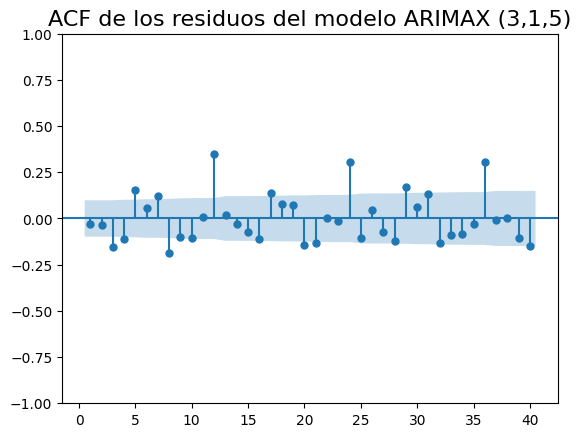

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(residuo_8, zero = False, lags = 40)
plt.title("ACF de los residuos del modelo ARIMAX (3,1,5)", size=16)
plt.show()

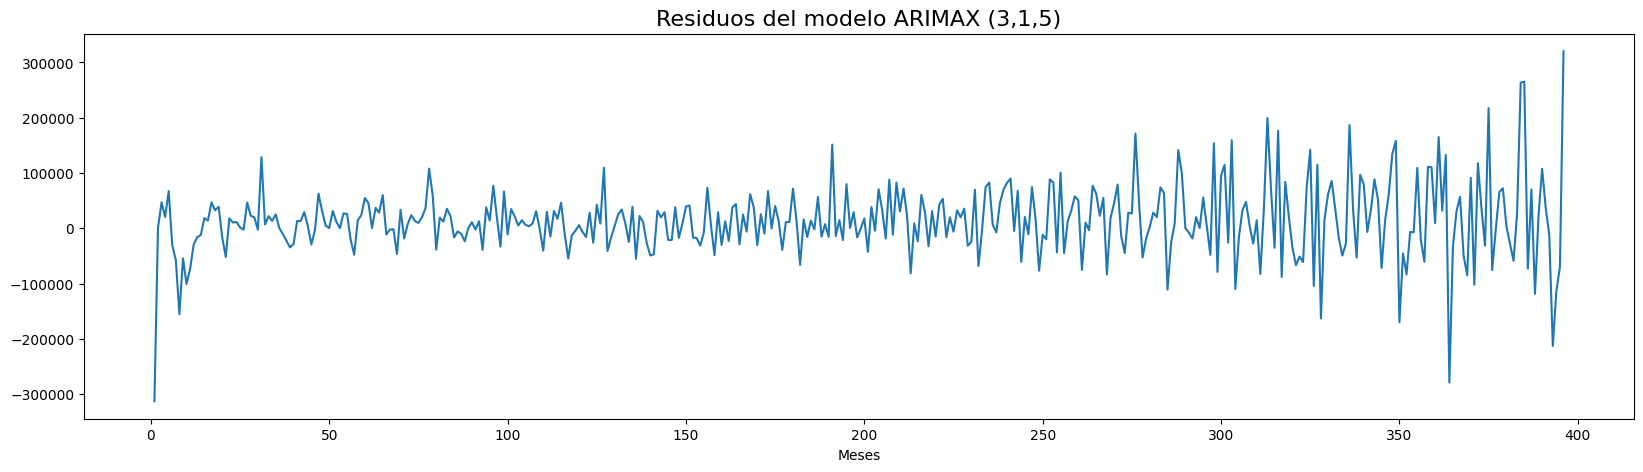

In [ ]:
residuo_8.plot(figsize=(20,5))
plt.title("Residuos del modelo ARIMAX (3,1,5)",size=16)
plt.xlabel("Meses")
plt.show()

***11.5 Previsión de la Energía requerida mensual (2023 -2024) Modelo ARIMAX (3,1,5)***

In [ ]:
df_03 = pd.read_excel("/content/previsión_temperatura_mensual.xlsx", parse_dates=['Temperatura'], index_col='Meses')

In [ ]:
temp_series = df_03["Temperatura"]
temp_series = temp_series.astype(float)

In [ ]:
predictions_2 = model_2_fit.predict(start=396, end=419, exog=temp_series)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
print(predictions_2)

396    2.089180e+06
397    2.009763e+06
398    1.859287e+06
399    1.703283e+06
400    1.534700e+06
401    1.349566e+06
402    1.202645e+06
403    1.339533e+06
404    1.519947e+06
405    1.746672e+06
406    1.922621e+06
407    2.002108e+06
408    2.056617e+06
409    2.013262e+06
410    1.890131e+06
411    1.694024e+06
412    1.513761e+06
413    1.384290e+06
414    1.292087e+06
415    1.385218e+06
416    1.582411e+06
417    1.731717e+06
418    1.865145e+06
419    1.984801e+06
Name: predicted_mean, dtype: float64


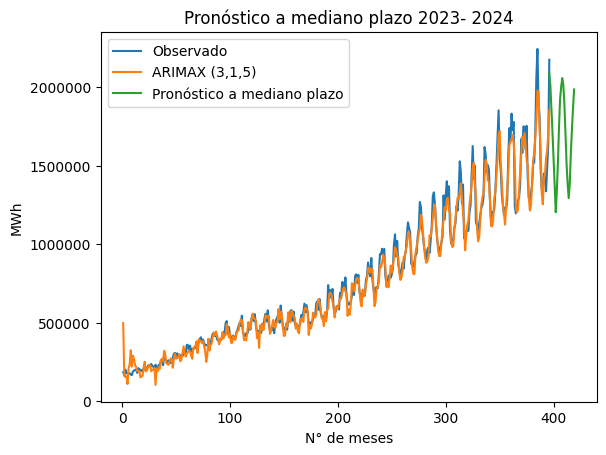

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df = pd.concat([data, arimax_tot, predictions_2], axis=1)
#GRÁFICO
ax = concatenated_df.plot(legend=False)
ax.legend(['Observado', 'ARIMAX (3,1,5)', 'Pronóstico a mediano plazo' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a mediano plazo 2023- 2024')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

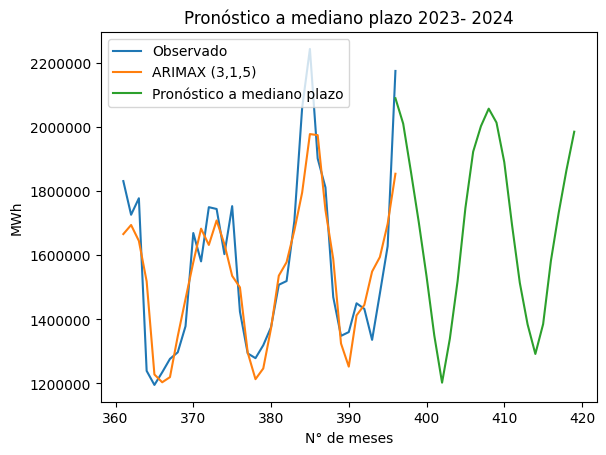

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df = pd.concat([data[360:], arimax_tot[360:], predictions_2], axis=1)
#GRÁFICO
ax = concatenated_df.plot(legend=False)
ax.legend(['Observado', 'ARIMAX (3,1,5)', 'Pronóstico a mediano plazo' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a mediano plazo 2023- 2024')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

# **12. SARIMAX (3,1,5)(2,0,0,12)**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p, d, q = 3, 1, 5  # Órdenes no estacionales (igual que en ARIMA)
P, D, Q, s = 2, 0, 0, 12  # Órdenes estacionales
sarimax_model = SARIMAX(data, exog=df_02['Temperatura'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_fit = sarimax_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred_4= sarimax_fit.predict(start=0, end=len(data)-1, dynamic=False)

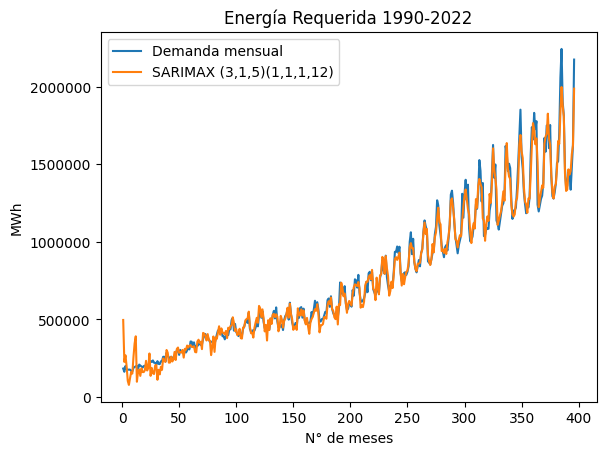

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_1 = pd.concat([data, y_pred_4], axis=1)
#GRÁFICO
ax = concatenated_df_1.plot(legend=False)
ax.legend(['Demanda mensual', 'SARIMAX (3,1,5)(1,1,1,12)'])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Energía Requerida 1990-2022')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

***12.1 Resumen estadistico del modelo SARIMAX***

In [ ]:
sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       Energía (MWh)   No. Observations:                  396
Model:             SARIMAX(3, 1, 5)x(2, 0, [], 12)   Log Likelihood               -4875.770
Date:                             Tue, 28 Nov 2023   AIC                           9775.540
Time:                                     11:25:37   BIC                           9823.287
Sample:                                          0   HQIC                          9794.458
                                             - 396                                         
Covariance Type:                               opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperatura  1.675e+04   1138.826     14.710      0.000    1.45e+04     1.9e+04
ar.L1          -0.6222      0.224     -2.777      0.005      -1.061      -0.183
ar.L2           0.8770      0.056     15.708      0.000       0.768       0.986
ar.L3           0.6041      0.211      2.861      0.004       0.190       1.018
ma.L1           0.0137      0.222      0.062      0.951      -0.422       0.450
ma.L2          -1.5551      0.160     -9.728      0.000      -1.868      -1.242
ma.L3          -0.3679      0.276     -1.333      0.182      -0.909       0.173
ma.L4           0.6003      0.159      3.777      0.000       0.289       0.912
ma.L5           0.3358      0.068      4.951      0.000       0.203       0.469
ar.S.L12        0.4885      0.044     11.116      0.000       0.402       0.575
ar.S.L24        0.3608      0.047      7.690      0.000       0.269       0.453
sigma2       3.614e+09      0.002    2.3e+12      0.000    3.61e+09    3.61e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               363.89
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               4.51   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.73e+27. Standard errors may be unstable.
"""

In [ ]:
print('Coefficients:\n', sarimax_fit.params)
print('P-values:', sarimax_fit.pvalues)
print('AIC:', sarimax_fit.aic)
print('BIC:', sarimax_fit.bic)
print('Log Likelihood:', sarimax_fit.llf)

Coefficients:
 Temperatura    1.675230e+04
ar.L1         -6.222471e-01
ar.L2          8.770023e-01
ar.L3          6.041455e-01
ma.L1          1.374235e-02
ma.L2         -1.555109e+00
ma.L3         -3.678871e-01
ma.L4          6.002909e-01
ma.L5          3.357983e-01
ar.S.L12       4.885413e-01
ar.S.L24       3.607846e-01
sigma2         3.613790e+09
dtype: float64
P-values: Temperatura    5.548434e-49
ar.L1          5.492129e-03
ar.L2          1.333716e-55
ar.L3          4.216851e-03
ma.L1          9.507350e-01
ma.L2          2.293712e-22
ma.L3          1.824185e-01
ma.L4          1.588714e-04
ma.L5          7.385743e-07
ar.S.L12       1.045303e-28
ar.S.L24       1.466248e-14
sigma2         0.000000e+00
dtype: float64
AIC: 9775.54013932262
BIC: 9823.286768501433
Log Likelihood: -4875.77006966131


***12.2 Métricas de errores SARIMAX***

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Cálculo del RMSE
rmse_5 = np.sqrt(mean_squared_error(df['Energía (MWh)'] , y_pred_4))
# Cálculo del MAE
mae_5 = mean_absolute_error(df['Energía (MWh)'] , y_pred_4)
test_array = df['Energía (MWh)'].to_numpy().flatten()
y_pred_5_array = y_pred_4.to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape_5 = np.mean(np.abs((test_array - y_pred_5_array) / test_array)) * 100
# Cálculo del R^2
r2_5 = r2_score(df['Energía (MWh)'], y_pred_4)
print(f'RMSE: {rmse_5:.2f}')
print(f'MAE: {mae_5:.2f}')
print(f'MAPE: {mape_5:.2f}%')
print(f'R^2: {r2_5:.3f}')

RMSE: 57314.67
MAE: 38940.77
MAPE: 7.02%
R^2: 0.984


***12.3 Gráficos del ACF y PACF del modelo SARIMAX***

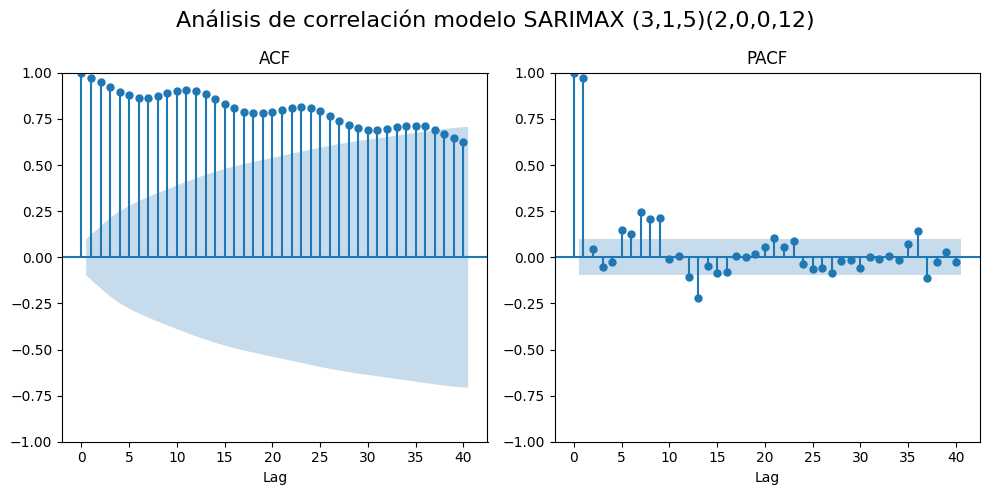

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Graficar ACF y PACF modelo MA (1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(y_pred_4, lags=40, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(y_pred_4, lags=40, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación modelo SARIMAX (3,1,5)(2,0,0,12)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(y_pred_4)
# Suma de coeficientes ACF significativos
acf_sum_5 = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(y_pred_4))])
# Número de coeficientes ACF significativos
num_signif_5 = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(y_pred_4))])
# Promedio ACF primeros 10 lags
acf_mean40_5 = np.mean(np.abs(acf_values[:40]))
print('Métricas ACF:')
print('Suma:', acf_sum_5)
print('Num Significativos:', num_signif_5)
print('Promedio 40:', acf_mean40_5)

Métricas ACF:
Suma: 22.371094924740508
Num Significativos: 26
Promedio 40: 0.8604267278746349


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(y_pred_4)
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum_5 = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(y_pred_4))])
# Número de coeficientes significativos
num_signif_5 = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(y_pred_4))])
# Promedio PACF primeros 40 lags
pacf_mean40_5= np.mean(np.abs(pacf_values[:40]))
print('Métricas PACF:')
print('Suma:', pacf_sum_5)
print('Número significativos:', num_signif_5)
print('Promedio 40 lags:', pacf_mean40_5)

Métricas PACF:
Suma: 2.7525350922908696
Número significativos: 13
Promedio 40 lags: 0.16866220294068787


***12.4 Análisis de residuos del modelo SARIMAX***

In [ ]:
residuo_9 = sarimax_fit.resid

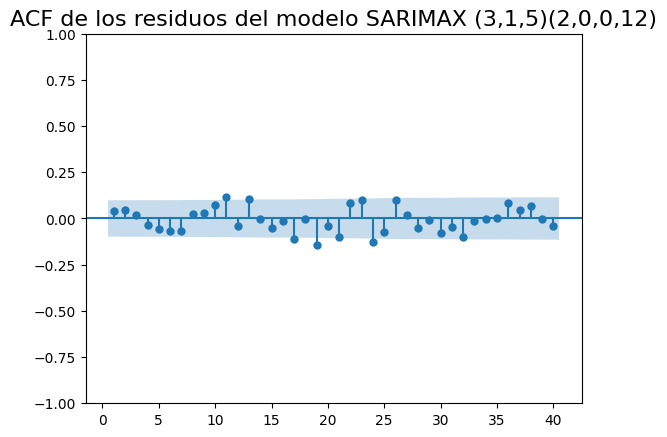

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(residuo_9, zero = False, lags = 40)
plt.title("ACF de los residuos del modelo SARIMAX (3,1,5)(2,0,0,12)", size=16)
plt.show()

# **Prueba de Dicky Fuller**

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_9)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: -19.517385
p-valor: 0.000000
Valores Críticos:
	1%: -3.447
	5%: -2.869
	10%: -2.571


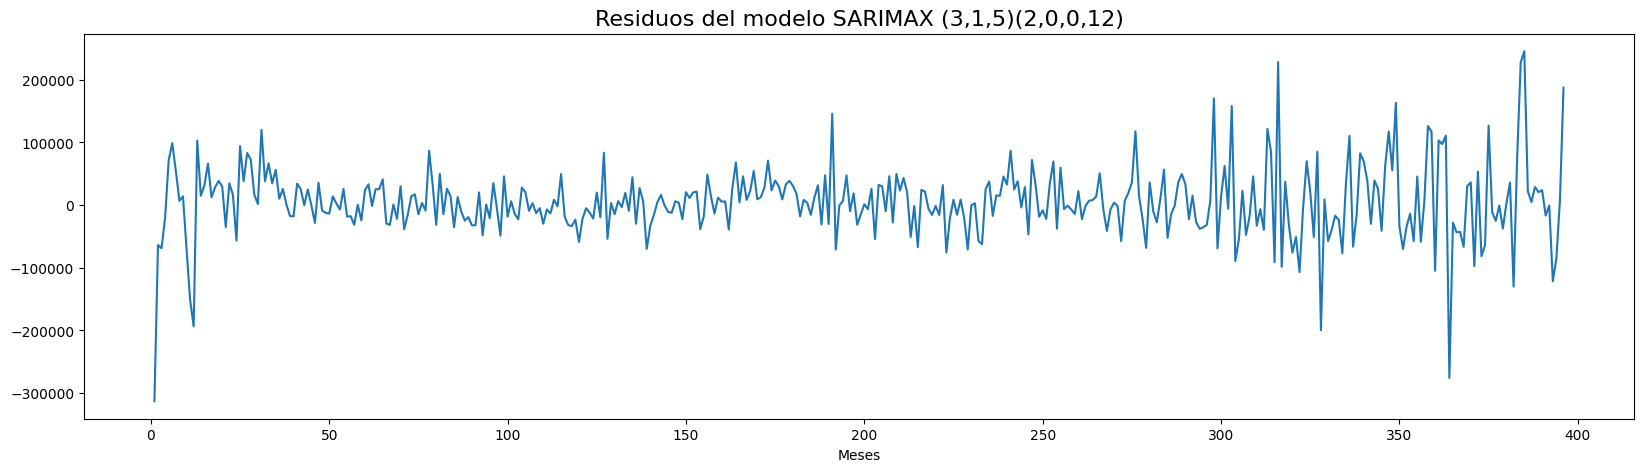

In [ ]:
residuo_9.plot(figsize=(20,5))
plt.title("Residuos del modelo SARIMAX (3,1,5)(2,0,0,12)",size=16)
plt.xlabel("Meses")
plt.show()

***12.5 Previsión de la Energía requerida mensual (2023 -2024) Modelo ARIMAX (3,1,5)***

In [ ]:
predictions_12 = sarimax_fit.predict(start=396, end=419, exog=temp_series)

In [ ]:
print(predictions_12)

396    2.152624e+06
397    1.916840e+06
398    1.897351e+06
399    1.655943e+06
400    1.589196e+06
401    1.515967e+06
402    1.420850e+06
403    1.500894e+06
404    1.553053e+06
405    1.694945e+06
406    1.870261e+06
407    2.178851e+06
408    2.239288e+06
409    2.006733e+06
410    1.991851e+06
411    1.712414e+06
412    1.640923e+06
413    1.627135e+06
414    1.579134e+06
415    1.633018e+06
416    1.687389e+06
417    1.773383e+06
418    1.893317e+06
419    2.241933e+06
Name: predicted_mean, dtype: float64


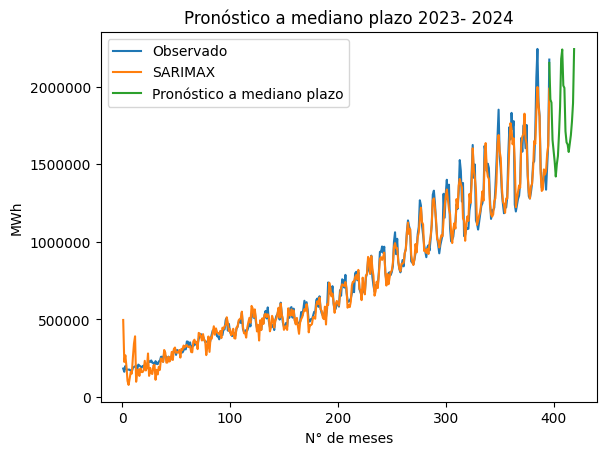

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df = pd.concat([data, y_pred_4, predictions_12], axis=1)
#GRÁFICO
ax = concatenated_df.plot(legend=False)
ax.legend(['Observado', 'SARIMAX', 'Pronóstico a mediano plazo' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a mediano plazo 2023- 2024')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

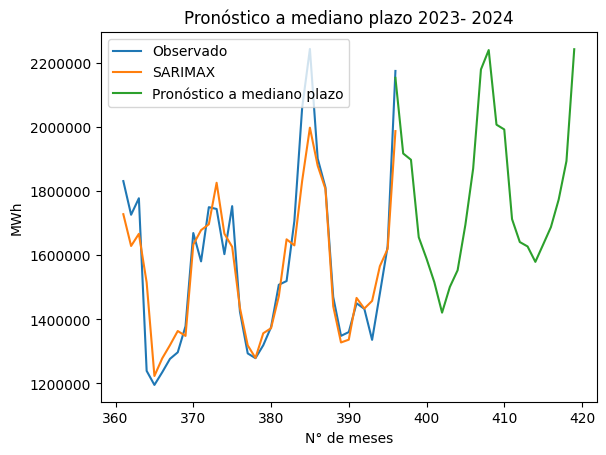

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df = pd.concat([data[360:], y_pred_4[360:], predictions_12], axis=1)
#GRÁFICO
ax = concatenated_df.plot(legend=False)
ax.legend(['Observado', 'SARIMAX', 'Pronóstico a mediano plazo' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a mediano plazo 2023- 2024')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

# ***13. Modelo de Holt Winters***

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Ajustar modelo Holt-Winters
hw_model = ExponentialSmoothing(data, trend='mul', seasonal='mul', seasonal_periods=12).fit()
warnings.filterwarnings("ignore")

In [ ]:
y_pred_13= hw_model.fittedvalues

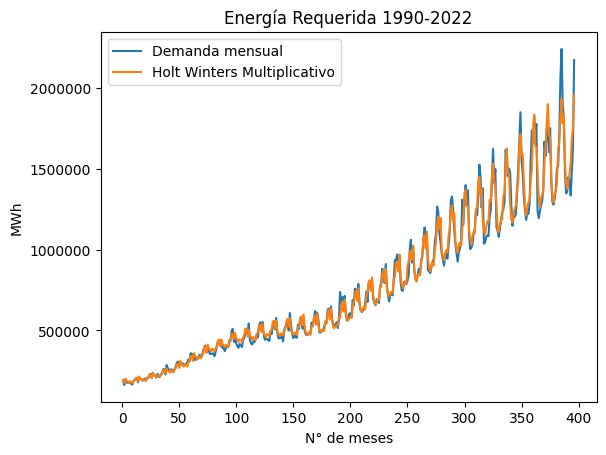

In [ ]:
# Gráfico
ax = df['Energía (MWh)'].plot(legend=True, label='Demanda mensual')
y_pred_13.plot(ax=ax, label='Holt Winters Multiplicativo')
ax.set_title('Energía Requerida 1990-2022')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
ax.legend(loc='best')

plt.show()

***13.1 Métricas de error del Holt Winters***

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse_13 = np.sqrt(mean_squared_error(data, y_pred_13))
mae_13 = mean_absolute_error(data, y_pred_13)
test_array = data.to_numpy().flatten()
y_pred_13_array = y_pred_13.to_numpy().flatten()
# Cálculo del MAPE (Mean Absolute Percentage Error)
mape_13 = np.mean(np.abs((test_array - y_pred_13_array) / test_array)) * 100
# Cálculo del R^2
r2_13 = r2_score(data, y_pred_13)

print(f'RMSE: {rmse_13:.2f}')
print(f'MAE: {mae_13:.2f}')
print(f'MAPE: {mape_13:.2f}%')
print(f'R^2: {r2_13*100:.2f}%')

RMSE: 55631.50
MAE: 33790.80
MAPE: 3.94%
R^2: 98.46%


In [ ]:
print(hw_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:            Energía (MWh)   No. Observations:                  396
Model:             ExponentialSmoothing   SSE                  1225566067286.990
Optimized:                         True   AIC                           8685.792
Trend:                   Multiplicative   BIC                           8749.494
Seasonal:                Multiplicative   AICC                          8687.606
Seasonal Periods:                    12   Date:                 Mon, 27 Nov 2023
Box-Cox:                          False   Time:                         19:39:51
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0757143                alpha                 True
smoothing_trend          

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
residuals = data - hw_model.fittedvalues
sigma = residuals.std()
n = len(data)
ll = -0.5*n*np.log(2*np.pi) - n*np.log(sigma) - 0.5*(residuals**2).sum()/sigma**2

print('Log Verosimilitud:', ll)

Log Verosimilitud: -4888.795654680482


***13.2 Previsión de la Energía Requerida Mensual (2023 -2024)***

In [ ]:
y_pred_13_1 = hw_model.forecast(steps=24)

In [ ]:
print(y_pred_13_1)

396    2.089287e+06
397    1.859583e+06
398    1.865711e+06
399    1.549884e+06
400    1.424434e+06
401    1.404964e+06
402    1.469294e+06
403    1.490769e+06
404    1.521395e+06
405    1.690820e+06
406    1.797098e+06
407    2.051781e+06
408    2.172927e+06
409    1.934027e+06
410    1.940401e+06
411    1.611930e+06
412    1.481458e+06
413    1.461208e+06
414    1.528114e+06
415    1.550448e+06
416    1.582301e+06
417    1.758509e+06
418    1.869041e+06
419    2.133920e+06
dtype: float64


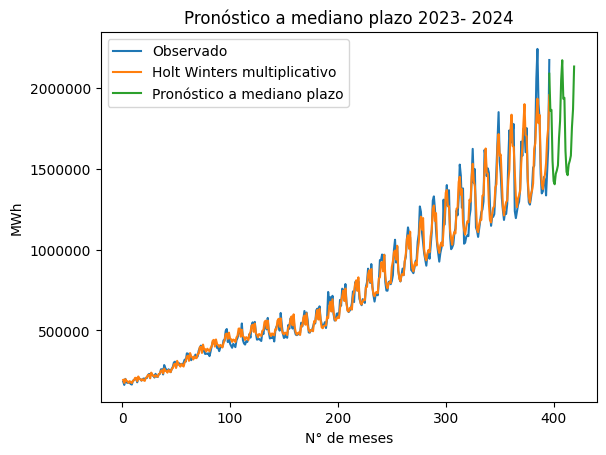

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df = pd.concat([data, y_pred_13, y_pred_13_1], axis=1)
#GRÁFICO
ax = concatenated_df.plot(legend=False)
ax.legend(['Observado', 'Holt Winters multiplicativo', 'Pronóstico a mediano plazo' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a mediano plazo 2023- 2024')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

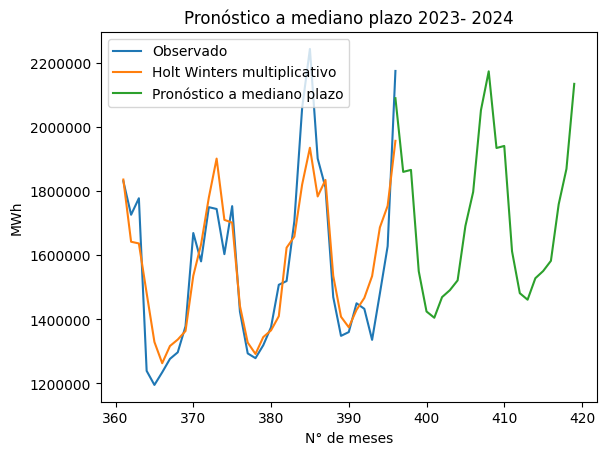

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df = pd.concat([data[360:], y_pred_13[360:], y_pred_13_1], axis=1)
#GRÁFICO
ax = concatenated_df.plot(legend=False)
ax.legend(['Observado', 'Holt Winters multiplicativo', 'Pronóstico a mediano plazo' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a mediano plazo 2023- 2024')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

In [ ]:
residuo_10 = hw_model.resid

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuo_10)
print('ADF Estadístico: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Estadístico: -5.655555
p-valor: 0.000001
Valores Críticos:
	1%: -3.448
	5%: -2.869
	10%: -2.571


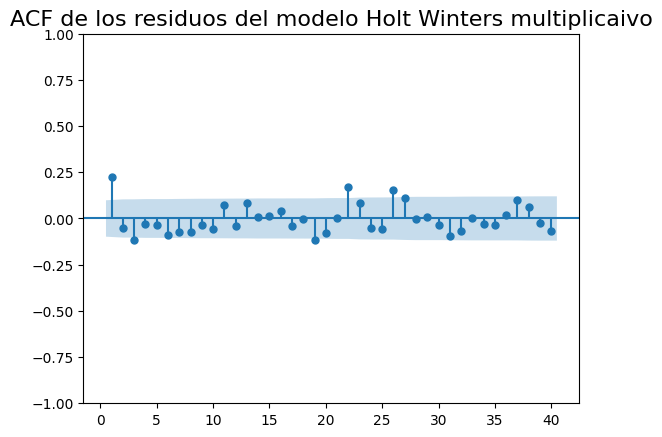

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(residuo_10, zero = False, lags = 40)
plt.title("ACF de los residuos del modelo Holt Winters multiplicaivo", size=16)
plt.show()

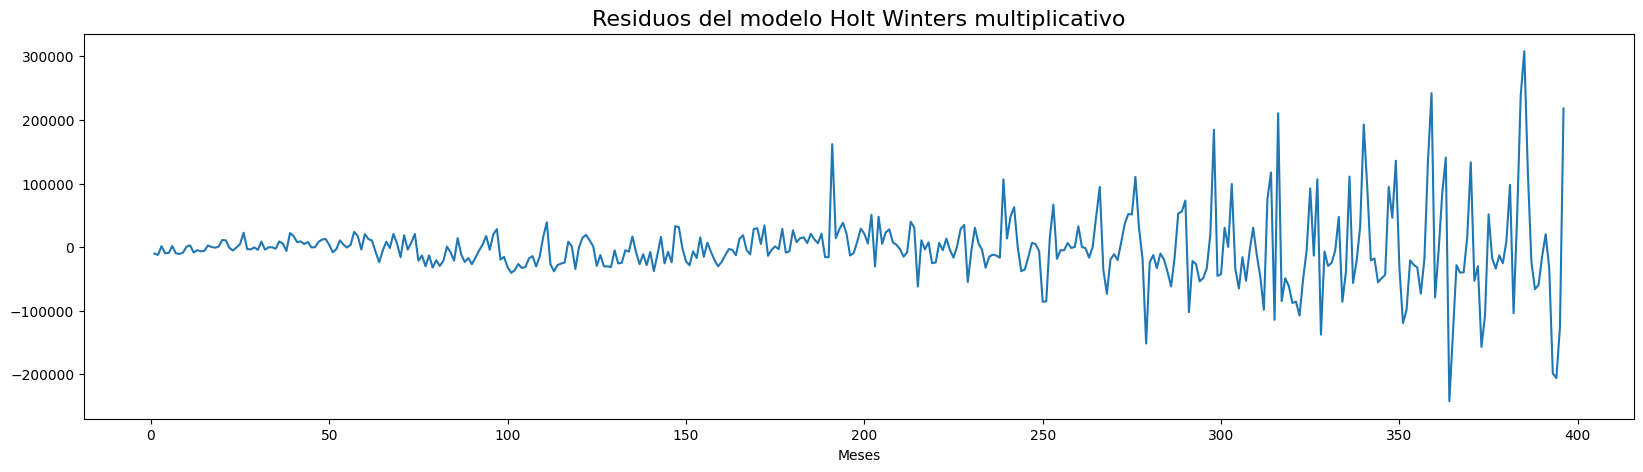

In [ ]:
residuo_10.plot(figsize=(20,5))
plt.title("Residuos del modelo Holt Winters multiplicativo",size=16)
plt.xlabel("Meses")
plt.show()

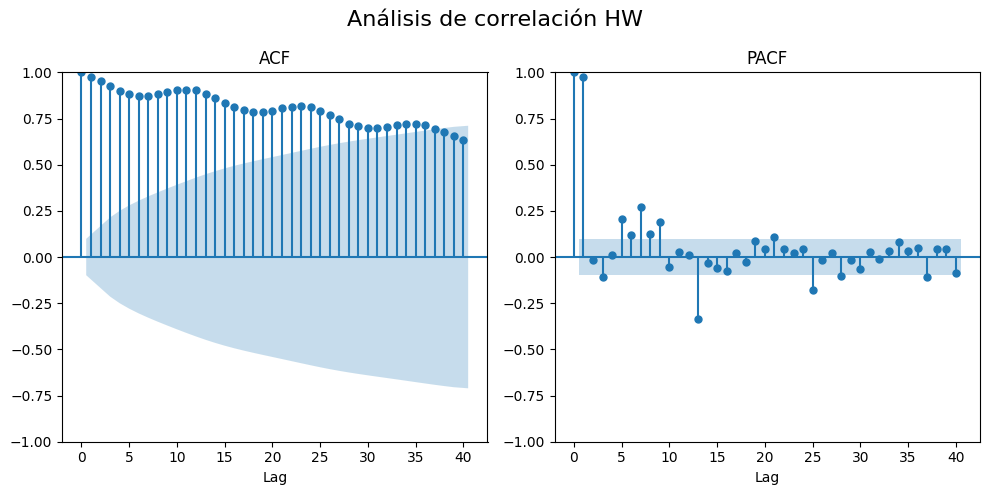

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Graficar ACF y PACF modelo MA (1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plot_acf(y_pred_13, lags=40, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_title('ACF')
plot_pacf(y_pred_13, lags=40, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_title('PACF')
plt.suptitle('Análisis de correlación HW', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf
import numpy as np
# Métricas para cuantificar ACF
# Calcula ACF
acf_values = acf(y_pred_13)
# Suma de coeficientes ACF significativos
acf_sum = np.sum(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(y_pred_13))])
# Número de coeficientes ACF significativos
num_signif = len(acf_values[np.abs(acf_values) > 1.96/np.sqrt(len(y_pred_13))])
# Promedio ACF primeros 10 lags
acf_mean10 = np.mean(np.abs(acf_values[:40]))
print('Métricas ACF:')
print('Suma:', acf_sum)
print('Num Significativos:', num_signif)
print('Promedio 40:', acf_mean10)

Métricas ACF:
Suma: 22.453349476814548
Num Significativos: 26
Promedio 40: 0.8635903644928672


In [ ]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# Calcula PACF
pacf_values = pacf(y_pred_13)
# Métricas para cuantificar PACF
# Suma de coeficientes PACF significativos
pacf_sum = np.sum(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(y_pred_13))])
# Número de coeficientes significativos
num_signif = len(pacf_values[np.abs(pacf_values) > 1.96/np.sqrt(len(y_pred_13))])
# Promedio PACF primeros 40 lags
pacf_mean10 = np.mean(np.abs(pacf_values[:40]))

print('Métricas PACF:')
print('Suma:', pacf_sum)
print('Número significativos:', num_signif)
print('Promedio 40 lags:', pacf_mean10)

Métricas PACF:
Suma: 2.372295127126463
Número significativos: 12
Promedio 40 lags: 0.17847848653084236


In [ ]:
from statsmodels.tsa.stattools import acf, pacf
import scipy.stats
import numpy as np
# Nivel de confianza 95%
conf_level = 0.95
# Valor crítico
z_crit = scipy.stats.norm.ppf(1 - (1-conf_level)/2)
# Función ACF
acf_values = acf(y_pred_13)
threshold_acf = z_crit/np.sqrt(len(y_pred_13))
acf_sig = acf_values[np.abs(acf_values) > threshold_acf]
acf_sum = np.sum(acf_sig)
acf_num_sig = len(acf_sig)

# Función PACF
pacf_values = pacf(y_pred_13)
threshold_pacf = z_crit/np.sqrt(len(y_pred_13))
pacf_sig = pacf_values[np.abs(pacf_values) > threshold_pacf]
pacf_sum = np.sum(pacf_sig)
pacf_num_sig = len(pacf_sig)

# Imprimir métricas
print('ACF Suma:', acf_sum)
print('ACF Num Significativos:', acf_num_sig)

print('PACF Suma:', pacf_sum)
print('PACF Num Significativos:', pacf_num_sig)

ACF Suma: 22.453349476814548
ACF Num Significativos: 26
PACF Suma: 2.372295127126463
PACF Num Significativos: 12


**1. Suma de los coeficientes ACF  y PACF significativos:**

Sumar los coeficientes de ACF y PACF que sean estadísticamente significativos. Mientras MAYOR sea esta suma, más **fuerte es la dependencia serial en la serie de tiempo**, es decir, que los valores pasados de la serie tienen una influencia más significativa en los valores presentes.

**2. Número de coeficientes ACF y PACF significativos:**

Contar el número de coeficientes de ACF y PACF significativos. A MAYOR número, mayor ***estructura de dependencia temporal***.

***RESUMEN:***

Una alta dependencia serial = autocorrelación alta

Una estructura fuerte de dependencia temporal = autocorrelación significativa


# ***CONCATENAMOS ARIMAX, SARIMA y Holt Winters***

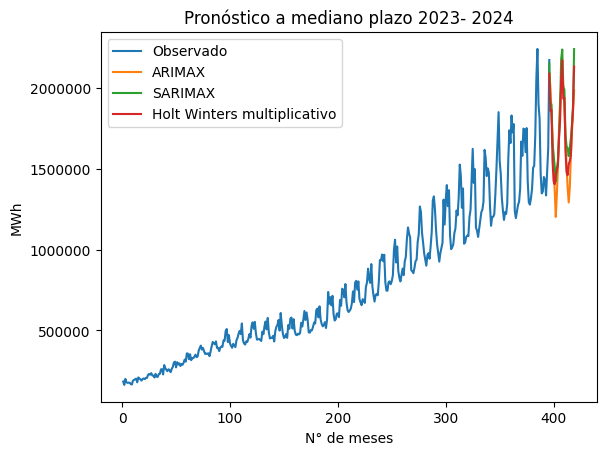

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_con = pd.concat([data,predictions_2,predictions_12, y_pred_13_1], axis=1)
#GRÁFICO
ax = concatenated_df_con.plot(legend=False)
ax.legend(['Observado','ARIMAX',"SARIMAX",'Holt Winters multiplicativo' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a mediano plazo 2023- 2024')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

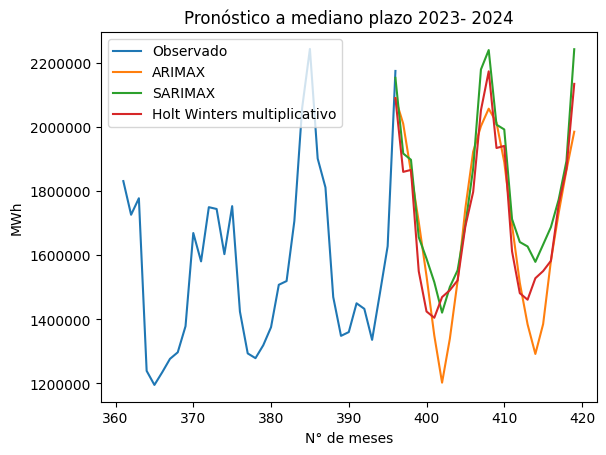

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
concatenated_df_con = pd.concat([data[360:],predictions_2,predictions_12, y_pred_13_1], axis=1)
#GRÁFICO
ax = concatenated_df_con.plot(legend=False)
ax.legend(['Observado','ARIMAX',"SARIMAX",'Holt Winters multiplicativo' ])
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x)))
ax.set_title('Pronóstico a mediano plazo 2023- 2024')
ax.set_xlabel('N° de meses')
ax.set_ylabel('MWh')
plt.show()

In [ ]:
#FIN DEL ANÁLISIS A MEDIANO PLAZO#

# ***FIN DEL ANÁLISIS A MEDIANO PLAZO***

FIN DEL ANÁLISIS A MEDIANO PLAZO*

FIN DEL ANÁLISIS A MEDIANO PLAZO*

FIN DEL ANÁLISIS A MEDIANO PLAZO*

In [ ]:
#FIN DEL ANÁLISIS A MEDIANO PLAZO#

In [ ]:
#FIN DEL ANÁLISIS A MEDIANO PLAZO#

In [ ]:
#FIN DEL ANÁLISIS A MEDIANO PLAZO#